# **CS 334 Project: Group 2**
Our purpose is to make an ML model which helps us predict the price of used laptops. In addition, key-insights into the features and market is also something we aim to uncover.

This notebook provides a detailed code repository for our project divided into specific sections:
1. Data Cleaning
2. Deep Analysis of our Dataset
3. Model Training
4. Model Prediction to answer our Research Qs.

Important Notes:
- **Our Blog/Report:** https://medium.com/@s.muhammad.abdullah67/used-laptops-market-heres-what-the-data-tells-us-463ceceb51ce
- **Our Presentation:** https://drive.google.com/file/d/1QBdol7WPIJmTViuK11oxuPabcC5LfCkH/view?usp=sharing
- **Research Q1:** Can a predictive ML be made which predicts the price of the laptop based on given values of these parameters?
- **Research Q2:** Which of the following parameters, as analyzed below, is the most crucial when it comes to determining the price of Laptops?



## **Part 1: Cleaning Data**

### Loading dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sheet_id = "1iIthdabZXow_cD23EDxOFVjCqi00KIfaplDLz4AvOXg"
sheet_name = "0"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx&id={sheet_id}&gid={sheet_name}"
df = pd.read_excel(url, engine='openpyxl')
df

,Brand,Name,Year of Manufacture,Type,Generation,Company,Processor,Frequency (GHz),Operating System,Colour,Graphics,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery (Watt Hours),Screen Size (inch),Touch?,Launch Price
0,HP,640 G5 Probook,2019.0,Laptop,8th,Intel,i5-8250U,1.6 GHz,Windows,Silver,4GB,256,8,54000,1920x1080,48.0,14.0,No,85000.0
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8th Gen,Intel,Core i5,1.6 GHz Turbo Boost 3.4,Windows,Silver,Integrated Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42.0,15.6,No,87000.0
2,HP,EliteBook 820 G4,2017.0,Laptop,7th,Intel,Core i5 7300U,2.5,Windows,White,Intel HD Graphics 620,256,8,47000,1366x768,49.0,12.5,No,90000.0
3,HP,EliteBook 820 G4,2017.0,Elite Book,7th Gen,Intel,Core i7,2.7 GHz Turbo Boost up to 3.5 GHz,Windows,Silver,‎Intel HD Graphics 620,256GB,8GB DDR4,53000,1920x1080,49.0,12.5,Yes,93999.0
4,HP,HP i3 12th Gen (grey),2022.0,Others,12th Gen,Intel,Core i3,1.2 GHz,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41.0,15.6,No,110000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Dell,XPS 13 7390,2019.0,Comet Lake,10th Gen,Intel,Core i7-10710U,1.1 (Turbo Boost 4.7),Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51.0,13.3,No,NaN
294,Dell,XPS 15 9570,2018.0,Ultrabook,8th Gen,Intel,Core i7-8750H,2.2 (Turbo Boost 4.1),Windows 10 Pro,Silver,Intel UHD 630,512,16,150000,1920x1080,97.0,15.6,No,NaN
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13th Gen,Intel,Core i5-1345U,1.6 (Turbo Boost 4.7),Windows 10 Pro,Silver,Integrated Intel Iris Xe Graphics,512,16,158500,1920x1080,54.0,15.6,No,NaN
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11th Gen,Intel,Core i7-11850H,2.5 (Turbo Boost 4.8),Windows 10 Pro,Space grey,Intel Mobile WM590,512,32,275000,1920x1080,95.0,15.6,No,NaN


Our second `df2` containing the `launch prices` of 135 laptops..

In [ ]:
sheet_id = "1-ZVTSMLpN83kGg4rm8xW1V74SzHAUtrFCffjQT-WBfs"
sheet_name = "0"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx&id={sheet_id}&gid={sheet_name}"
df_dep = pd.read_excel(url, engine='openpyxl')
df_dep

,Brand,Name,Year of Manufacture,Type,Generation,Company,Processor,GHz,Operating System,Colour,Graphics,SSD (GB),RAM (GB),Screen Resolution,Battery (Watt Hours),Screen Size (inch),Touch?,Launch Price,Price (PKR)
0,MSI,Prestige 14,2019,Ultrabook,10th Gen,Intel,Core i7,1.1,Windows 10,White,NVIDIA GeForce GTX 1650,512,16,1920x1080,52.0,14.0,Yes,403800,80000
1,Asus,Chromebook C423NA,2010,NaN,1st,Intel,Intel Celeron N3350,1.1,Chrome OS,Silver,Intel HD Graphics 500,64,4,1366 x 768,38.0,14.0,No,72400,52300
2,Samsung,Series 7,2011,Laptop,2nd,Intel,quad-core Intel Core i7-3615QM,2.2,Windows 10,Black,Nvidia GeForce GT 650M graphics,256,8,1920 x 1080 (LEd),27.0,17.3,No,529200,29000
3,Acer,Swift 5,2017,Ultrabook,8th,Intel,Core i5,1.8,Windows 10,Green,2GB,256,8,1920x1080,56.0,14.0,Yes,194800,65000
4,Asus,ExpertBook P1,2019,NaN,10th,Intel,Intel Core i5,1,Windows 10,Black,Integrated,256,8,1920 x 1080,37.0,15.6,No,473400,460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Apple,MacBook Pro,2019,Laptop,9th,Intel,i7,2.6,macOS,Grey,Radeon Pro 5300M,512,16,3072x1920,100.0,16.0,No,667200,250000
131,Apple,MacBook Pro,2017,Laptop,7th,Intel,i7,2.3,macOS,Grey,Intel Iris Plus 640,1024,16,2560x1600,54.5,13.3,No,667200,115000
132,Apple,MacBook Pro,2019,Laptop,9th,Intel,i7,2.6,macOS,Grey,Radeon Pro 5300M,512,16,3072x1920,100.0,16.0,No,667200,190000
133,Apple,MacBook Pro M1,2021,Laptop,1st,Apple,M1 Pro,3.2,macOS,Grey,M1 Pro GPU,512,16,3456x2234,100.0,16.0,No,695000,435000


### Structuring data



Firstly, renaming columns..

In [ ]:
df.drop("Launch Price", axis=1, inplace=True)

We do not need the launch price here, we will be using the other dataframe for it, because we could not get the launch price data for all the laptops, so we are not including that column in this dataframe.


In [ ]:
df.drop("Company", axis=1, inplace=True)

We do not even need the Company field, because it does not give us any new information, which the brand can not.


In [ ]:
df.rename(columns={"Name":"Model Name", "Year of Manufacture":"Manufacture Year", "Type":"Laptop Type","Generation":"Processor Generation", "Processor":"Processor Type", "Frequency (GHz)":"Processor Speed (GHz)","Graphics":"Graphics Card","Battery (Watt Hours)":"Battery Capacity (Wh)","Screen Size (inch)":"Screen Size (inches)","Touch?":"Touchscreen?"}, inplace=True)

So, we have 19 fields and 298 records. Let us drop any duplicate records.

In [ ]:
df=df.drop_duplicates()
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8th,i5-8250U,1.6 GHz,Windows,Silver,4GB,256,8,54000,1920x1080,48.0,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8th Gen,Core i5,1.6 GHz Turbo Boost 3.4,Windows,Silver,Integrated Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42.0,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7th,Core i5 7300U,2.5,Windows,White,Intel HD Graphics 620,256,8,47000,1366x768,49.0,12.5,No
3,HP,EliteBook 820 G4,2017.0,Elite Book,7th Gen,Core i7,2.7 GHz Turbo Boost up to 3.5 GHz,Windows,Silver,‎Intel HD Graphics 620,256GB,8GB DDR4,53000,1920x1080,49.0,12.5,Yes
4,HP,HP i3 12th Gen (grey),2022.0,Others,12th Gen,Core i3,1.2 GHz,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41.0,15.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11th Gen,Core i5,2.4 (Turbo Boost 4.2),Windows 10 Pro,Silver,Integrated Intel Iris X Graphics,512,8,131900,1920x1200,52.0,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10th Gen,Core i7-10710U,1.1 (Turbo Boost 4.7),Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51.0,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13th Gen,Core i5-1345U,1.6 (Turbo Boost 4.7),Windows 10 Pro,Silver,Integrated Intel Iris Xe Graphics,512,16,158500,1920x1080,54.0,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11th Gen,Core i7-11850H,2.5 (Turbo Boost 4.8),Windows 10 Pro,Space grey,Intel Mobile WM590,512,32,275000,1920x1080,95.0,15.6,No


So we had one duplicate record.

Now let's check for null values.

In [ ]:
df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,1
Laptop Type,10
Processor Generation,5
Processor Type,0
Processor Speed (GHz),1
Operating System,0
Colour,0
Graphics Card,2


### Treatment of Null Values


only 1 entry turns out to be null whose manufacture year we can duly fill in using public domain info about the model


In [ ]:
df[df['Manufacture Year'].isnull()]
df.loc[df['Manufacture Year'].isnull(), 'Manufacture Year'] = 2024
df['Manufacture Year'].value_counts() # checking for error entries

,count
Manufacture Year,
2019.0,49
2020.0,40
2021.0,39
2018.0,36
2017.0,29
2016.0,25
2022.0,24
2024.0,11
2023.0,11


In [ ]:
column_indices = {name: idx for idx, name in enumerate(df.columns)}
print(column_indices)

{'Brand': 0, 'Model Name': 1, 'Manufacture Year': 2, 'Laptop Type': 3, 'Processor Generation': 4, 'Processor Type': 5, 'Processor Speed (GHz)': 6, 'Operating System': 7, 'Colour': 8, 'Graphics Card': 9, 'SSD (GB)': 10, 'RAM (GB)': 11, 'Price (PKR)': 12, 'Screen Resolution': 13, 'Battery Capacity (Wh)': 14, 'Screen Size (inches)': 15, 'Touchscreen?': 16}


In [ ]:
#Laptop Type
df[df['Laptop Type'].isnull()]

#Providing the laptop models against whom data is missing
df.iloc[[219,3]] = 'Vivobook'
df.iloc[[220,3]] = 'Gaming'
df.iloc[[221,3]] = 'ZenBook'
df.iloc[[222,3]] = 'Gaming'
df.iloc[[223,3]] = 'Vivobook'
df.iloc[[224,3]] = 'ZenBook'
df.iloc[[225,3]] = 'ExpertBook'
df.iloc[[226,3]] = 'Chromebopk'
df.iloc[[227,3]] = 'Vivobook'
df.iloc[[228,3]] = 'Gaming'

df['Laptop Type'].value_counts()
# Reforming the spelling mistakes
df.loc[df['Laptop Type'] == 'Chromebopk', 'Laptop Type'] = 'Chromebook'
df.loc[df['Laptop Type'] == 'Others (ZBook)', 'Laptop Type'] = 'ZBook'
df.loc[df['Laptop Type'] == 'Laotop', 'Laptop Type'] = 'Laptop'

df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,0
Laptop Type,0
Processor Generation,5
Processor Type,0
Processor Speed (GHz),1
Operating System,0
Colour,0
Graphics Card,2


In [ ]:
df[df['Processor Generation'].isnull()]

# Filling these values based on actual data
df.iloc[11,4]=5
df.iloc[125, 4]=4
df.iloc[165,4]=2
df.iloc[204, 4]=4
df.iloc[286, 4]=2
df['Processor Generation'].value_counts()
df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,0
Laptop Type,0
Processor Generation,0
Processor Type,0
Processor Speed (GHz),1
Operating System,0
Colour,0
Graphics Card,2


In [ ]:
df[df['Processor Speed (GHz)'].isnull()]
df.iloc[200,6] = 4.8
df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,0
Laptop Type,0
Processor Generation,0
Processor Type,0
Processor Speed (GHz),0
Operating System,0
Colour,0
Graphics Card,2


In [ ]:
df[df['Graphics Card'].isnull()]
df['Graphics Card']=df['Graphics Card'].fillna('Not specified')
df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,0
Laptop Type,0
Processor Generation,0
Processor Type,0
Processor Speed (GHz),0
Operating System,0
Colour,0
Graphics Card,0


**We did stratified sampling, so the proportions of laptop brand names in this dataset roughly represent their proportions in the market of used laptops.**

In [ ]:
df["Brand"].value_counts()

,count
Brand,
Dell,67
HP,66
Apple,53
Lenovo,48
Acer,17
Samsung,8
Toshiba,5
Microsoft,5
Fujitsu,4


In [ ]:
# Checking for errors
df['Manufacture Year'].value_counts()
df[(df['Manufacture Year']=='Vivobook')|(df['Manufacture Year']=='ZenBook')|(df['Manufacture Year']=='Gaming') | (df['Manufacture Year'] == 'Chromebook')|(df['Manufacture Year'] == 'ExpertBook')]
rows_to_drop = df[(df['Manufacture Year']=='Vivobook')|(df['Manufacture Year'] == 'ZenBook')|(df['Manufacture Year'] == 'Gaming')|(df['Manufacture Year']=='Chromebopk')|(df['Manufacture Year'] == 'ExpertBook')].index
df = df.drop(rows_to_drop)


In [ ]:
df['Manufacture Year'].value_counts()

,count
Manufacture Year,
2019.0,46
2020.0,39
2021.0,39
2018.0,36
2017.0,26
2016.0,25
2022.0,24
2024.0,11
2023.0,11


In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8th,i5-8250U,1.6 GHz,Windows,Silver,4GB,256,8,54000,1920x1080,48.0,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8th Gen,Core i5,1.6 GHz Turbo Boost 3.4,Windows,Silver,Integrated Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42.0,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7th,Core i5 7300U,2.5,Windows,White,Intel HD Graphics 620,256,8,47000,1366x768,49.0,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12th Gen,Core i3,1.2 GHz,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41.0,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,Core i5,4.2,Windows,Blue,Integrated Intel® UHD Graphics 620,256,16,120000,1920x1080,24.0,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11th Gen,Core i5,2.4 (Turbo Boost 4.2),Windows 10 Pro,Silver,Integrated Intel Iris X Graphics,512,8,131900,1920x1200,52.0,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10th Gen,Core i7-10710U,1.1 (Turbo Boost 4.7),Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51.0,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13th Gen,Core i5-1345U,1.6 (Turbo Boost 4.7),Windows 10 Pro,Silver,Integrated Intel Iris Xe Graphics,512,16,158500,1920x1080,54.0,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11th Gen,Core i7-11850H,2.5 (Turbo Boost 4.8),Windows 10 Pro,Space grey,Intel Mobile WM590,512,32,275000,1920x1080,95.0,15.6,No


### Processor Generation

In [ ]:
df["Processor Generation"]=df["Processor Generation"].astype(str).str.extract(r"(\d+)")

In [ ]:
df.dtypes

,0
Brand,object
Model Name,object
Manufacture Year,object
Laptop Type,object
Processor Generation,object
Processor Type,object
Processor Speed (GHz),object
Operating System,object
Colour,object
Graphics Card,object


Now let's clean the processor type

We are trying to extract i followed by a digit in the processor type field, if it has data like "Core i7" Otherwise, it should remain unchanged.

In [ ]:
import re

In [ ]:
def core_processor(processor):
  processor_match=re.search(r"i\d", processor)
  if processor_match:
    return processor_match.group()
  else:
    return processor

In [ ]:
df["Processor Type"]=df["Processor Type"].apply(core_processor)

In [ ]:
def core_processor2(processor):
  processor_match=re.search(r"Ryzen \d", processor)
  if processor_match:
    return processor_match.group()
  else:
    return processor

In [ ]:
df["Processor Type"]=df["Processor Type"].apply(core_processor2)

The processor field now has core, ryzen, and M processors in a uniform format. However, there are some processors which are of unique types. Let's check them.

In [ ]:
df[~df["Processor Type"].str.match(r'(^i\d)|(^M)|(^Ryzen)')]

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
32,HP,Spectre x360,2019.0,Laptop,10,Not Specified,1.7 GHz,Windows,Black/Gold,Intel Iris Xe Graphics,1000,16,170000,‎3840x2160,68.0,13.3,Yes
83,Dell,Precision 7560,2021.0,Laptop,11,W-11855M Xeon,3.2GHz With Turbo Boost 4.9GHz,Windows 11 Pro,black,NVidia Quadro T1200- 4GB,512,32,265000,1920x1080,97.0,15.6,No
95,HP,255 G7 Notebook,2020.0,Laptop,7,AMD Athlon Silver 3050U,2.3,Windows,Silver,AMD Radeon 2GB,256,8,48000,1366x768,41.0,15.6,No
97,HP,AMD Processor Laptop,2015.0,Laptop,5,AMD,2.0 - 2.4,Windows,Black,512MB Dedicated Card,500,8,25000,1366x768,41.0,15.6,No
102,HP,Core i-5 8th Generation,2018.0,Laptop,8,Not Specified,1.6GHz,Windows,White,Intel HD Graphics 620,512,16,82000,1920x1080,50.0,15.6,No
153,Apple,MacBook Pro,2006.0,Laptop,0,c2d,2.16,macOS,Grey,Radeon X1600,120,2,18500,1440x900,60.0,15.4,No
187,Dell,Precision 5530,2018.0,Workstation,NaN,E-2176 Intel Xeon,2.7GHz With Turbo Boost 4.4GHz,Windows 10 Pro,white,NVidia Quadro P2000,512,32,170000,1920x1080,97.0,15.6,No
200,Samsung,Galaxy Book 4 Pro,2024.0,Laptop,14,intel (R) Core (TM) ultra 7 155H 3.80GHz,4.8,Windows,moon stone grey,Not specified,512,16,400000,2880x1800,63.0,13.0,Yes
204,Samsung,Series 3,2011.0,Laptop,4,AMD A6-4400M APU,2.7,Windows 7,Black,Radeon(tm) HD Graphics,124,8,26000,1366x768,25.16,15.6,No


### Processor Speed/Frequency

Now, let's deal with the processor speed field. We will only use the base speed to come the laptops. We will not be using the boost speed.

In [ ]:
df["Processor Speed (GHz)"]=df["Processor Speed (GHz)"].astype(str).str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,4GB,256,8,54000,1920x1080,48.0,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Integrated Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42.0,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel HD Graphics 620,256,8,47000,1366x768,49.0,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41.0,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Integrated Intel® UHD Graphics 620,256,16,120000,1920x1080,24.0,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Integrated Intel Iris X Graphics,512,8,131900,1920x1200,52.0,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51.0,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Integrated Intel Iris Xe Graphics,512,16,158500,1920x1080,54.0,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Space grey,Intel Mobile WM590,512,32,275000,1920x1080,95.0,15.6,No


In [ ]:
df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,0
Laptop Type,0
Processor Generation,2
Processor Type,0
Processor Speed (GHz),0
Operating System,0
Colour,0
Graphics Card,0


In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,4GB,256,8,54000,1920x1080,48.0,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Integrated Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42.0,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel HD Graphics 620,256,8,47000,1366x768,49.0,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41.0,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Integrated Intel® UHD Graphics 620,256,16,120000,1920x1080,24.0,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Integrated Intel Iris X Graphics,512,8,131900,1920x1200,52.0,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51.0,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Integrated Intel Iris Xe Graphics,512,16,158500,1920x1080,54.0,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Space grey,Intel Mobile WM590,512,32,275000,1920x1080,95.0,15.6,No


### Graphics Card

In [ ]:
df['Graphics Card'].value_counts()

,count
Graphics Card,
Intel® UHD Graphics,20
Intel UHD Graphics,20
Intel HD Graphics 620,12
Intel Iris Xe Graphics,11
M2 GPU,10
...,...
4GB Internal Sharing Graphics,1
Intel UHD 620 (Shared),1
4GB Graphic Memory,1


In [ ]:

df['Graphics Card'] = df['Graphics Card'].str.lower()
df['Graphics Card'] = df['Graphics Card'].str.strip()
df['Graphics Card'].value_counts()

#dealing with intel
intel_rows = df[df['Graphics Card'].str.contains('intel', case=False, na=False)]
intel_rows['Graphics Card'].value_counts()
''' major categories are {intel uhd graphics, intel uhd graphics 620 (same as intel hd graphics 620),
  intel iris xe graphics, intel hd graphics 520, not specified, intel uhd 4400, intel hd graphics 4000,
  intel hd graphics 4600, intel iris plus, intel uhd 617, intel xeon e5-1535m v5, intel hd 5500, intel hd 530, intel hd 6000}
'''
# 1. intel uhd graphics
intel_uhd_rows = df[
    df['Graphics Card'].str.contains('intel', case=False, na=False) &
    df['Graphics Card'].str.contains('uhd', case=False, na=False) &
    ~df['Graphics Card'].str.contains(r'\d', na=False)
]
intel_uhd_rows['Graphics Card'].value_counts()
intel_uhd_rows['Graphics Card'] = 'Intel UHD Graphics'
df.loc[intel_uhd_rows.index, 'Graphics Card'] = 'Intel UHD Graphics'

# 2. intel uhd graphics 620
intel_uhd_620_rows = df[df['Graphics Card'].str.contains('620', case=False, na=False)]
intel_uhd_620_rows['Graphics Card'].value_counts()
intel_uhd_620_rows['Graphics Card'] = 'Intel UHD Graphics 620'
df.loc[intel_uhd_620_rows.index, 'Graphics Card'] = intel_uhd_620_rows['Graphics Card']

# 3. intel iris xe graphics
intel_xe_rows = df[
    df['Graphics Card'].str.contains(r'intel', case=False, na=False) &
    df['Graphics Card'].str.contains(r'iris', case=False, na=False) &
    ~df['Graphics Card'].str.contains(r'xeon', case=False, na=False) &
    ~(df['Graphics Card'].str.contains('plus', case=False, na=False))
]
intel_xe_rows['Graphics Card'].value_counts()
intel_xe_rows['Graphics Card'] = 'Intel Iris Xe Graphics'
df.loc[intel_xe_rows.index, 'Graphics Card'] = 'Intel Iris Xe Graphics'

# 4. intel hd graphics 520
intel_hd_520_rows = df[df['Graphics Card'].str.contains('520', case=False, na=False)]
intel_hd_520_rows['Graphics Card'].value_counts()
intel_hd_520_rows['Graphics Card'] = 'Intel HD Graphics 520'
df.loc[intel_hd_520_rows.index, 'Graphics Card'] = intel_hd_520_rows['Graphics Card']

# 5. intel uhd 4400
intel_uhd_4400_rows = df[(df['Graphics Card'].str.contains('4400', case=False, na=False))]
intel_uhd_4400_rows['Graphics Card'].value_counts()
intel_uhd_4400_rows['Graphics Card'] = 'Intel UHD 4400'
df.loc[intel_uhd_4400_rows.index, 'Graphics Card'] = intel_uhd_4400_rows

# 6. intel hd graphics 4000
intel_hd_4000_rows = df[(df['Graphics Card'].str.contains('4000', case=False, na=False))]
intel_hd_4000_rows['Graphics Card'].value_counts()
intel_hd_4000_rows['Graphics Card'] = 'Intel HD Graphics 4000'
df.loc[intel_hd_4000_rows.index, 'Graphics Card'] = intel_hd_4000_rows

# 7. intel hd graphics 4600
intel_hd_4600_rows = df[(df['Graphics Card'].str.contains('4600', case=False, na=False))]
intel_hd_4600_rows['Graphics Card'].value_counts()
intel_hd_4600_rows['Graphics Card'] = 'Intel HD Graphics 4600'
df.loc[intel_hd_4600_rows.index, 'Graphics Card'] = intel_hd_4600_rows

# 8. intel iris plus
intel_iris_plus_rows = df[(df['Graphics Card'].str.contains('plus', case=False, na=False))]
intel_iris_plus_rows['Graphics Card'].value_counts()
intel_iris_plus_rows['Graphics Card'] = 'Intel Iris Plus'
df.loc[intel_iris_plus_rows.index, 'Graphics Card'] = intel_iris_plus_rows

# 9. intel uhd 617
intel_uhd_617_rows = df[(df['Graphics Card'].str.contains('617', case=False, na=False))]
intel_uhd_617_rows['Graphics Card'].value_counts()
intel_uhd_617_rows['Graphics Card'] = 'Intel UHD 617'
df.loc[intel_uhd_617_rows.index, 'Graphics Card'] = intel_uhd_617_rows['Graphics Card']

# 10. intel xeon
intel_xeon_rows = df[(df['Graphics Card'].str.contains('xeon', case=False, na=False))]
intel_xeon_rows['Graphics Card'].value_counts()
intel_xeon_rows['Graphics Card'] = 'Intel Xeon E5'
df.loc[intel_xeon_rows.index, 'Graphics Card'] = intel_xeon_rows['Graphics Card']

# 11. intel hd 5500
intel_hd_5500_rows = df[
    (df['Graphics Card'].str.contains('5500', case=False, na=False)) &
    ~df['Graphics Card'].str.contains('5500m', case=False, na=False) &
    df['Graphics Card'].str.contains('500', case=False, na=False)
  ]
intel_hd_5500_rows['Graphics Card'].value_counts()
intel_hd_5500_rows['Graphics Card'] = 'Intel HD Graphics 5500'
df.loc[intel_hd_5500_rows.index, 'Graphics Card'] = intel_hd_5500_rows['Graphics Card']

# 12. intel hd 530
intel_hd_530_rows = df[
    (df['Graphics Card'].str.contains('530', case=False, na=False)) &
    ~df['Graphics Card'].str.contains('5300m', case=False, na=False)
  ]
intel_hd_530_rows['Graphics Card'].value_counts()
intel_hd_530_rows['Graphics Card'] = 'Intel HD Graphics 530'
df.loc[intel_hd_530_rows.index, 'Graphics Card'] = intel_hd_530_rows['Graphics Card']

# Final treatment
rename_map_intel = {
    # Repeated/Similar Entries - Combined
    "Intel UHD Graphics": "Intel UHD Graphics",
    "Intel UHD Graphics 620": "Intel UHD Graphics 620",
    "Intel UHD 617": "Intel UHD Graphics 617",
    "Intel UHD 4400": "Intel UHD Graphics 4400",
    "intel uhd graphics + nvidia quadro p1000": "Intel UHD Graphics",  # Removing NVIDIA reference for Intel
    "intel uhd 630": "Intel UHD Graphics 630",
    "intel uhd 2200": "Intel UHD Graphics 2200",

    "Intel Iris Xe Graphics": "Intel Iris Xe Graphics",
    "Intel Iris Plus": "Intel Iris Plus Graphics",

    "Intel HD Graphics 4000": "Intel HD Graphics 4000",
    "Intel HD Graphics 520": "Intel HD Graphics 520",
    "Intel HD Graphics 4600": "Intel HD Graphics 4600",
    "Intel HD Graphics 5500": "Intel HD Graphics 5500",
    "intel hd 6000": "Intel HD Graphics 6000",
    "intel hd graphic 400": "Intel HD Graphics 400",
    "intel hd graphics 440": "Intel HD Graphics 440",
    "Intel HD Graphics 530": "Intel HD Graphics 530",

    # General Intel Graphics
    "intel hd": "Intel HD Graphics",
    "intel hd graphics": "Intel HD Graphics",
    "intel shared gpu": "Intel Integrated Graphics",
    "intel shared graphics": "Intel Integrated Graphics",
    "4gb intel (not specified)": "Intel Integrated Graphics",

    # Miscellaneous Intel Entries - Standardized
    "intel mobile wm590": "Intel Mobile Graphics WM590",
    "intel 550": "Intel Graphics 550",
    "Intel Xeon E5": "Intel Xeon Graphics",
    "intel smart": "Intel Smart Graphics"
}
df['Graphics Card'] = df['Graphics Card'].replace(rename_map_intel)

""" Let's check df['Graphics Card'] npw """
df['Graphics Card'].value_counts()

## Now's let's come to macbook graphics
macbook_rows = df[df["Graphics Card"].str.contains(r'\bm\d\b', case=False, na=False)]
macbook_rows['Graphics Card'].value_counts()
''' major categories are {m3 gpu, m2 gpu, m1 gpu, m1 pro gpu}
'''
# m3 gpu
m3_rows = df[(df['Graphics Card'].str.contains('m3', case=False, na=False))]
m3_rows['Graphics Card'].value_counts()
m3_rows['Graphics Card'] = 'M3 GPU'
df.loc[m3_rows.index, 'Graphics Card'] = m3_rows['Graphics Card']

# m2 gpu
m2_rows = df[df['Graphics Card'].str.contains(r'\bm2\b', case=False, na=False)]
m2_rows['Graphics Card'].value_counts()
m2_rows['Graphics Card'] = 'M2 GPU'
df.loc[m2_rows.index, 'Graphics Card'] = m2_rows['Graphics Card']

# m1 gpu
m1_rows = df[df['Graphics Card'].str.contains(r'\bm1\b', case=False, na=False) &
             ~df['Graphics Card'].str.contains(r'\bpro\b', case=False, na=False)]
m1_rows['Graphics Card'].value_counts()
m1_rows['Graphics Card'] = 'M1 GPU'
df.loc[m1_rows.index, 'Graphics Card'] = m1_rows['Graphics Card']

# m1 pro gpu
m1_pro_rows = df[df['Graphics Card'].str.contains(r'\bm1\b', case=False, na=False) &
                 df['Graphics Card'].str.contains(r'\bpro\b', case=False, na=False)]
m1_pro_rows['Graphics Card'].value_counts()
m1_pro_rows['Graphics Card'] = 'M1 Pro GPU'
df.loc[m1_pro_rows.index, 'Graphics Card'] = m1_pro_rows['Graphics Card']

# Let's deal with nvidia gpus now
nvidia_rows = df[df['Graphics Card'].str.contains('nvidia', case=False, na=False)]
nvidia_rows['Graphics Card'].value_counts()

# # Define mapping dictionary for uniform formatting
rename_map_nvidia = {
    # Repeated/Similar Entries - Combined
    "nvidia geforce gtx 1650": "NVIDIA GeForce GTX 1650",
    "nvidia gtx 1650 (4gb)": "NVIDIA GeForce GTX 1650",
    "nvidia geforce gtx 1050": "NVIDIA GeForce GTX 1050",
    "nvidia geforce gtx1050 (3gb)": "NVIDIA GeForce GTX 1050",
    "nvidia gtx 1050ti (4gb)": "NVIDIA GeForce GTX 1050",
    "nvidia gtx1050 ti": "NVIDIA GeForce GTX 1050",
    "6gb nvidia rtx 3060": "NVIDIA GeForce RTX 3060",
    "nvidia geforce rtx 3060 (6gb)": "NVIDIA GeForce RTX 3060",
    "nvidia rtx 3060 (6gb)": "NVIDIA GeForce RTX 3060",
    "nvidia rtx3060 6gb": "NVIDIA GeForce RTX 3060",
    "nvidia quadro p1000 (4gb)": "NVIDIA Quadro P1000",
    "intel uhd graphics + nvidia quadro p1000": "NVIDIA Quadro P1000",
    "4gb nvidia quadro p1000 gddr6": "NVIDIA Quadro P1000",
    "nvidia quadro p1000 (4gb gddr5)": "NVIDIA Quadro P1000",
    "nvidia quadro p3200": "NVIDIA Quadro P3200",
    "nvidia quadro p3200 (6gb)": "NVIDIA Quadro P3200",
    "nvidia quadro t1000": "NVIDIA Quadro T1000",
    "nvidia geforce gtx 1660 ti": "NVIDIA GeForce GTX 1660 Ti",

    # General NVIDIA Graphics
    "2gb nvidia graphics": "NVIDIA Graphics",
    "nvidia 2gb": "NVIDIA Graphics",

    # Unique/Specific Entries
    "nvidia geforce 940mx": "NVIDIA GeForce 940MX",
    "nvidia geforce mx250": "NVIDIA GeForce MX250",
    "nvidia geforce mx550 (2gb)": "NVIDIA GeForce MX550",
    "nvidia quadro t1200- 4gb": "NVIDIA Quadro T1200",
    "nvidia quadro p2000": "NVIDIA Quadro P2000",
    "nvidia geforce gt 650m graphics": "NVIDIA GeForce GT 650M",
    "nvidia geforce gt 640m": "NVIDIA GeForce GT 640M",
    "nvidia geforce rtx 2070": "NVIDIA GeForce RTX 2070",
    "nvidia rtx2000 ada gen": "NVIDIA RTX 2000 Ada Gen",
    "nvidia geforce rtx 3050 (4gb)": "NVIDIA GeForce RTX 3050",
    "nvidia geforce rtx 3050": "NVIDIA GeForce RTX 3050",
    "nvidia quadro m1000 (4gb gddr5)": "NVIDIA Quadro M1000",
    "nvidia quadro m2000m 4gb gddr5": "NVIDIA Quadro M2000M",
    "nvidia quadro rtx 8000 4gb": "NVIDIA Quadro RTX 8000",
    "nvidia rtx a2000": "NVIDIA RTX A2000",
}

df['Graphics Card'] = df['Graphics Card'].replace(rename_map_nvidia)

# Let's deal with AMD Radeon cards now
amd_rows = df[
    df['Graphics Card'].str.contains('radeon', case=False, na=False) |
    df['Graphics Card'].str.contains('amd', case=False, na=False)
]
amd_rows['Graphics Card'].value_counts()
rename_map_radeon = {
    "radeon pro 5300m": "AMD Radeon Pro 5300M",
    "radeon pro 555x": "AMD Radeon Pro 555X",
    "radeon 5500m": "AMD Radeon Pro 5500M",
    "amd radeon pro wx4150": "AMD Radeon Pro WX4150",
    "radeon pro 450": "AMD Radeon Pro 450",

    # General AMD Radeon
    "amd radeon graphics": "AMD Radeon Graphics",
    "amd radeon": "AMD Radeon Graphics",
    "integrated amd radeon graphics": "AMD Radeon Graphics",
    "radeon graphic card": "AMD Radeon Graphics",
    "amd radeon 2gb": "AMD Radeon Graphics",
    "1gb amd graphics": "AMD Radeon Graphics",
    "radeon(tm) hd graphics": "AMD Radeon Graphics",

    # Specific AMD Radeon cards
    "amd radeon hd 7570m": "AMD Radeon HD 7570M",
    "radeon x1600": "AMD Radeon X1600",
    "amd radeon vega graphics": "AMD Radeon Vega Graphics"
}

df['Graphics Card'] = df['Graphics Card'].replace(rename_map_radeon)


## Lastly, let's treat for miscellaneous values
miscl_rows = df[~df['Graphics Card'].str.contains(r'intel|nvidia|amd|radeon|m\d', case=False, na=False)]
miscl_rows['Graphics Card'].value_counts()

rename_map_miscl = {
    # Generic Entries - Standardized
    "not specified": "Graphics (Not Specified)",
    "integrated": "Integrated Graphics",
    "integrated graphics": "Integrated Graphics",
    "4gb internal sharing graphics": "Integrated Graphics (Shared 4GB)",
    "shared graphics": "Integrated Graphics",
    "4gb": "Graphics (4GB)",
    "2gb": "Graphics (2GB)",
    "6gb": "Graphics (6GB)",
    "8gb": "Graphics (8GB)",
    "1gb": "Graphics (1GB)",
    "4gb graphic memory": "Graphics (4GB)",
    "512mb dedicated card": "Graphics (512MB)",

    # Specific Entries - Standardized
    "4gb ddr5 t1000": "Graphics (4GB DDR5 T1000)",
    "inel iris xe graphics 4 gb": "Intel Iris Xe Graphics (4GB)",
    "hd graphics 515": "Intel HD Graphics 515",
    "uhd graphics": "Intel UHD Graphics",
    "rx 540 2gb graphics card": "AMD Radeon RX 540 (2GB)",
    "integrated powervr gx6250": "Integrated PowerVR GX6250 Graphics"
}

df['Graphics Card'] = df['Graphics Card'].replace(rename_map_miscl)

# counter

counts = df['Graphics Card'].value_counts()
counts_table = counts.reset_index()
counts_table.columns = ['Graphics Card', 'Count']
counts_table

# Finally Cleaned :)

,Graphics Card,Count
0,Intel UHD Graphics,47
1,Intel UHD Graphics 620,36
2,Intel Iris Xe Graphics,33
3,M3 GPU,11
4,AMD Radeon Graphics,10
...,...,...
66,AMD Radeon Pro 450,1
67,Intel HD Graphics 5500,1
68,Intel HD Graphics 515,1
69,NVIDIA Quadro P2000,1


In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48.0,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42.0,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49.0,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41.0,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24.0,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52.0,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51.0,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54.0,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Space grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95.0,15.6,No


### Cleaning battery capacity

In [ ]:
df["Battery Capacity (Wh)"]=df["Battery Capacity (Wh)"].astype(str).str.extract(r"(\d+)")

In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Space grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95,15.6,No


### Fixing screen resolution

In [ ]:
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.replace(" ","")
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.replace("^1080","1920x1080", regex=True)
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.replace(r"^(FullHD)|(FHD)","1920x1080", regex=True)
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.replace("*","x")
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.replace("^HD","1368x720", regex=True)
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.replace("(4K)$","3840x2160", regex=True)
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.replace("(2K)$","2048x1080", regex=True)
df["Screen Resolution"]=df["Screen Resolution"].astype(str).str.extract(r"(\d+x\d+)")

df["Screen Resolution"].tolist()

['1920x1080',
 '1920x1080',
 '1366x768',
 '1366x768',
 '1920x1080',
 '1920x1080',
 '1366x768',
 '1920x1080',
 '1366x768',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '3840x2160',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1366x768',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '3840x2160',
 '3840x2160',
 '1920x1080',
 '2560x1600',
 '2560x1600',
 '1920x1080',
 '1440x900',
 '1440x900',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1200',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '2560x1664',
 '2560x1664',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1366x768',
 '1920x1080',
 '3840x2160',
 '2560x1664',
 '2560x1664',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '1920x1080',
 '2560x1600',
 '2560x1600',
 '2560x1664',
 '2560x1664',
 '2560x1664',
 '2560x1664',
 '2880x1800',
 '1920x1080',
 '1920x1080',
 '1920x1080',


In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Space grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95,15.6,No


### Cleaning SSD & RAM

In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128GB SSD,8GB,75000,1920x1080,42,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256GB,4GB,99999,1366x768,41,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Space grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95,15.6,No


First we will convert all values to GB for SSD and RAM

In [ ]:
# Convert TB to GB for both 'SSD' and 'RAM' columns
def tb_to_gb_with_text(value):
    value = str(value)
    if 'TB' in value:
        # Extract only the numeric part and convert to GB
        num_part = ''.join(filter(str.isdigit, value.split('TB')[0]))
        if num_part:
            gb_value = int(num_part) * 1024
            return f"{gb_value}GB"
    return value

df['SSD (GB)'] = df['SSD (GB)'].apply(tb_to_gb_with_text)
df['RAM (GB)'] = df['RAM (GB)'].apply(tb_to_gb_with_text)

Now we will clear all the extra text from the SSD column.



In [ ]:
df['SSD (GB)'] = df['SSD (GB)'].astype(str).str.extract(r'(\d+)')

Same for RAM now...

In [ ]:
df['RAM (GB)'] = df['RAM (GB)'].astype(str).str.extract(r'(\d+)')

In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128,8,75000,1920x1080,42,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256,4,99999,1366x768,41,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Space grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95,15.6,No


### Cleaning Colour field

In [ ]:
df["Colour"].value_counts()

,count
Colour,
Black,89
Grey,63
Silver,51
black,32
Blue,7
white,7
White,7
gray,7
Space grey,6


In [ ]:
df["Colour"]=np.where(df["Colour"].str.contains(r'gr|Gr'), "Grey", df["Colour"])
df["Colour"]=np.where(df["Colour"].str.contains("black"), "Black", df["Colour"])
df["Colour"]=np.where(df["Colour"].str.contains("white"), "White", df["Colour"])
df["Colour"]=np.where(df["Colour"].str.contains("Gold"), "Gold", df["Colour"])
df["Colour"]=np.where(df["Colour"].str.contains("Silver"), "Silver", df["Colour"])
df["Colour"]=np.where(df["Colour"].str.contains("Blue"), "Blue", df["Colour"])

In [ ]:
df["Colour"].value_counts()

,count
Colour,
Black,121
Grey,79
Silver,51
White,14
Gold,8
Blue,7
Red,3
Platinum,2
Not provided,1


In [ ]:
df.head(10)

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128,8,75000,1920x1080,42,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256,4,99999,1366x768,41,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes
6,HP,EliteBook 845 G7,2020.0,Laptop,10,Ryzen 5,1.7,Windows,White,AMD Radeon Graphics,512,16,99999,1920x1080,53,14.0,Yes
7,HP,840 G5 Elite Book,2018.0,Elite Book,8,i5,1.6,Windows,White,AMD Radeon RX 540 (2GB),256,8,65000,1366x768,56,15.0,No
8,HP,EliteBook 850 G6,2019.0,EliteBook,8,i5,1.6,Windows 10 Pro,Silver,Intel UHD Graphics 620,512,16,109900,1920x1080,50,15.6,No
9,Dell,Inspiron 3501,2020.0,Laptop,8,i3,1.2,Ubuntu,Black,Intel UHD Graphics,128,8,64000,1366x768,42,15.6,No
10,HP,Pavilion Gaming 15 DK0068wm,2019.0,Laptop,9,i5,2.4,Windows,Black,NVIDIA GeForce GTX 1050,256,8,95000,1920x1080,52,15.6,Yes


## **Part 2: Analyzing our data for model prediction**



### **Pre-liminary set-up**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,0
Laptop Type,0
Processor Generation,2
Processor Type,0
Processor Speed (GHz),0
Operating System,0
Colour,0
Graphics Card,0


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
Brand,0
Model Name,0
Manufacture Year,0
Laptop Type,0
Processor Generation,0
Processor Type,0
Processor Speed (GHz),0
Operating System,0
Colour,0
Graphics Card,0


In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128,8,75000,1920x1080,42,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256,4,99999,1366x768,41,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95,15.6,No


### **Individual column analysis**

Let's take a deeper dive into our data case by case..





#### Brand

Firstly, let's understand what kind of laptop brands are part of our dataset

In [ ]:
df["Brand"].value_counts()

,count
Brand,
HP,66
Dell,66
Apple,53
Lenovo,47
Acer,17
Samsung,8
Toshiba,5
Microsoft,5
Fujitsu,4


In [ ]:
print(round(df["Brand"].value_counts().iloc[0:5].sum()/len(df["Brand"])*100,1),"%")

87.7 %


So we can see that almost 88% of the laptop entries are from 5 companies: HP, Dell, Apple, Lenovo and Acer. This is significant because in the second hand laptops market, these 5 companies dominate with a similar percentage.

In [ ]:
len(df["Brand"].value_counts())

16

We have data of 16 different brands.

#### Model name and laptop count

In [ ]:
df["Model Name"].value_counts()

,count
Model Name,
MacBook Pro,14
MacBook Air,8
MacBook Pro M1,7
MacBook M3 Pro,5
MacBook M3 Air,5
...,...
650 G9 Elite Book,1
OMEN 16-b0013dx,1
ZBook 15u G3,1


We have a huge variety of models: 196. Macbook pro was the most common one. This shows that the situation of the market is such that there is no single model which really dominates the used laptops market.

Now let's see how the number of laptops in our data vary with time.

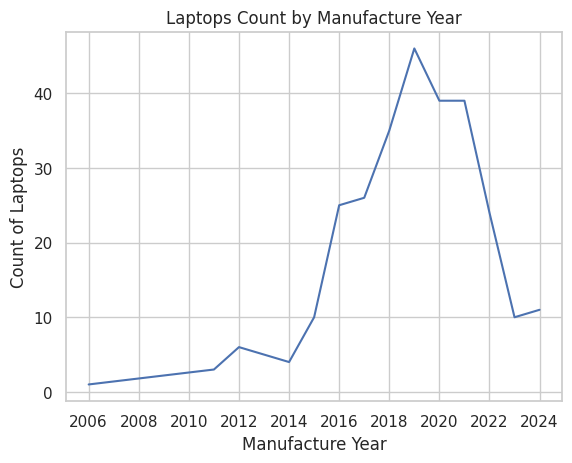

In [ ]:
df_year=df.groupby("Manufacture Year").count().reset_index()
sns.lineplot(data=df_year, x="Manufacture Year", y="Brand")
years=list(range(2006, 2025, 2))
plt.xticks(years);
plt.xlabel("Manufacture Year")
plt.ylabel("Count of Laptops")
plt.title("Laptops Count by Manufacture Year");

We can see that most of the laptops in our dataset were manufactured between 2016 and 2022. There are few laptops before 2014. This is probably because laptops more than 10 years old are not very popular in used laptops markets. There are less number of laptops which were manufactured 2022 onwards, because most likely the users just bought them and are not willing to sell them this soon.

#### Processor Gen

Now, processor generation is one of the most important fields. Let's analyze it.

In [ ]:
df["Processor Generation"].value_counts()

,count
Processor Generation,
8,59
10,44
11,35
7,29
6,20
9,17
2,17
3,14
4,13


It is interesting to note that there is a generation 0 as well. Let's see the record.


In [ ]:
df[df["Processor Generation"]=="0"]

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
153,Apple,MacBook Pro,2006.0,Laptop,0,c2d,2.16,macOS,Grey,AMD Radeon X1600,120,2,18500,1440x900,60,15.4,No


So, it is a mistake. It should be 1.

In [ ]:
df.loc[153,"Processor Generation"]="1"

Now let's set up Processor Generation for visualization..

In [ ]:
df['Processor Generation']=df['Processor Generation'].astype(int)

In [ ]:
df["Processor Generation"].value_counts()

,count
Processor Generation,
8,59
10,44
11,35
7,29
6,20
9,17
2,17
3,14
4,13


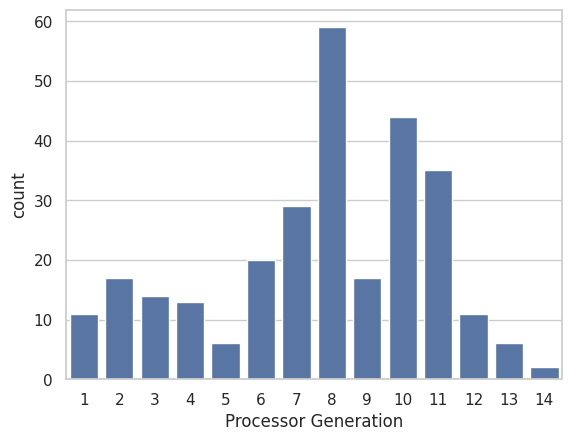

In [ ]:
sns.barplot(data=(df["Processor Generation"].value_counts().reset_index().sort_values("Processor Generation")), x="Processor Generation", y="count");

  Visualizing we see that the most popular processor generation is 8th. Looking at the data, we also observe that it has more than one peak. Let's explore this further, by drawing graphs of different brands separately.

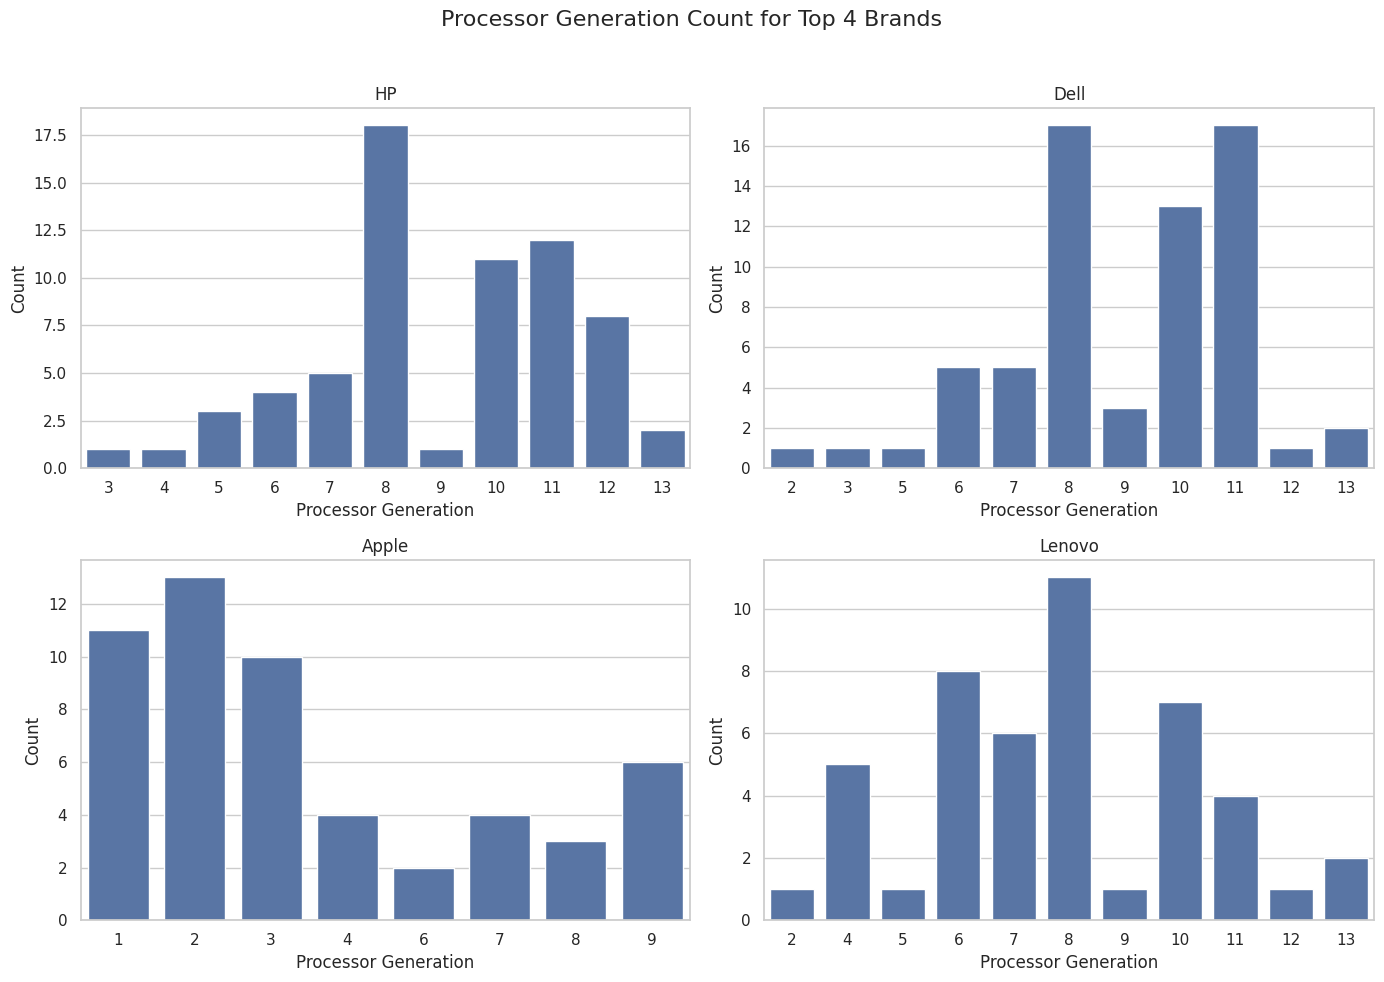

In [ ]:
top_brands = df["Brand"].value_counts().nlargest(4).index

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Processor Generation Count for Top 4 Brands", fontsize=16)

axes = axes.flatten()

for i, brand in enumerate(top_brands):
    brand_df = df[df["Brand"] == brand]

    processor_counts = brand_df["Processor Generation"].value_counts().reset_index()
    processor_counts.columns = ["Processor Generation", "Count"]

    sns.barplot(data=processor_counts.sort_values("Processor Generation"),
                x="Processor Generation", y="Count", ax=axes[i])

    axes[i].set_title(f"{brand}")
    axes[i].set_xlabel("Processor Generation")
    axes[i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


We can not see any specific patterns in the graphs of the top 4 brands, except that for Apple, most number of laptops are accummulated towards the lower side. Let's explore this further

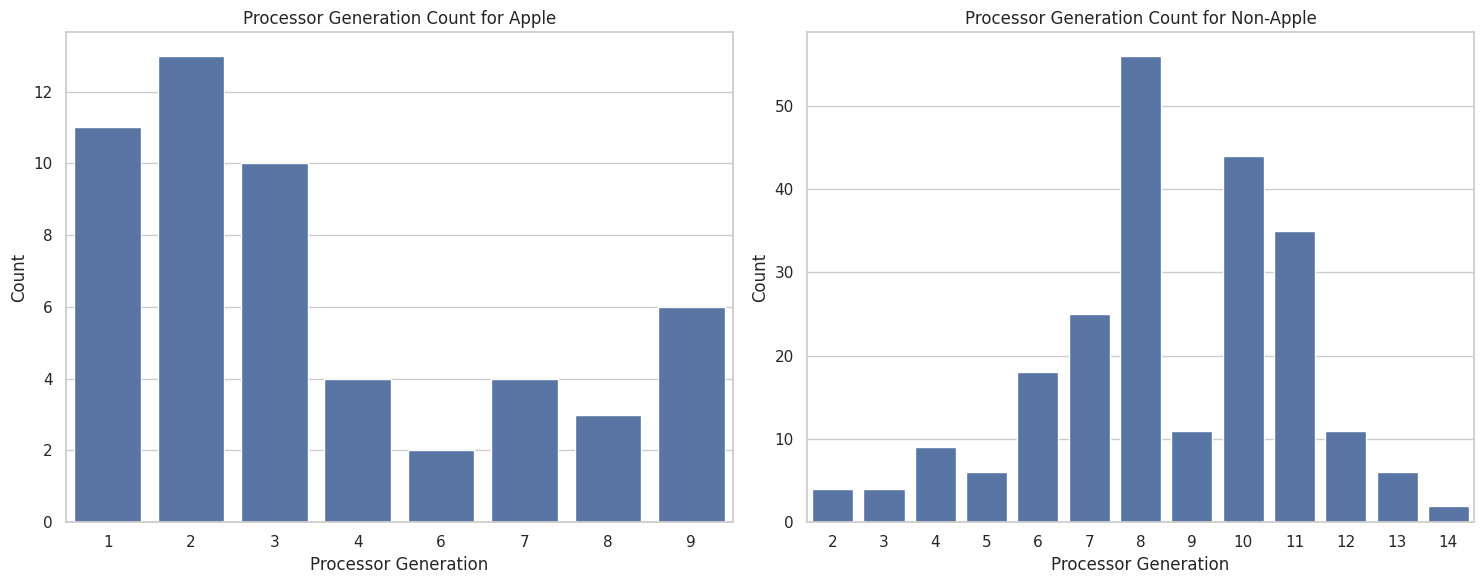

In [ ]:
apple_df = df[df["Brand"] == "Apple"]
non_apple_df = df[df["Brand"] != "Apple"]

apple_processor_counts = apple_df["Processor Generation"].value_counts().reset_index()
apple_processor_counts.columns = ["Processor Generation", "Count"]

non_apple_processor_counts = non_apple_df["Processor Generation"].value_counts().reset_index()
non_apple_processor_counts.columns = ["Processor Generation", "Count"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Apple
sns.barplot(data=apple_processor_counts.sort_values("Processor Generation"),
            x="Processor Generation", y="Count", ax=axes[0])
axes[0].set_title("Processor Generation Count for Apple")
axes[0].set_xlabel("Processor Generation")
axes[0].set_ylabel("Count")

# Plot for Non-Apple
sns.barplot(data=non_apple_processor_counts.sort_values("Processor Generation"),
            x="Processor Generation", y="Count", ax=axes[1])
axes[1].set_title("Processor Generation Count for Non-Apple")
axes[1].set_xlabel("Processor Generation")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


This gives us a better view that we have roughly two types of distibutions of laptop processor generation counts. Apple has the most number of laptops in the lower range, while non apple has most of laptops between 7 and 11. The reason for this may be the fact that the more recent Apple laptops are based on their own silicon instead of intel's indicating that people prefer Apple's own silicon (M series processors). It is interesting to note that for non-Apple, we would have expected a higher number for 9th generation, but we see that their number turns out to be very less.

#### Processor Type

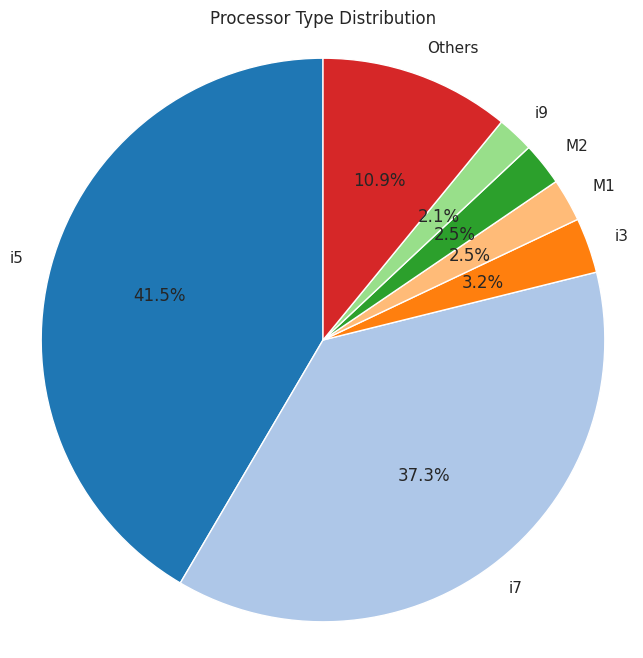

In [ ]:
processor_counts = df['Processor Type'].value_counts()
threshold = 6
other_processors = processor_counts[processor_counts<threshold].sum()

top_processors = processor_counts[processor_counts >= threshold]
top_processors['Others'] = other_processors
colors = plt.cm.tab20(range(len(top_processors)))
plt.figure(figsize=(8, 8))
plt.pie(top_processors, labels=top_processors.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Processor Type Distribution')
plt.axis('equal')
plt.show()

This is a very surprising piece of information and we had not expected this at all. While collecting data, we ensured that we are collecting it randomly, and so, we expected an almost uniform distribution of Processor Types, but it turns out that "i7" and "i5" overwhelmingly dominate the used laptops market. This is very interesting.

#### Processor Speeds

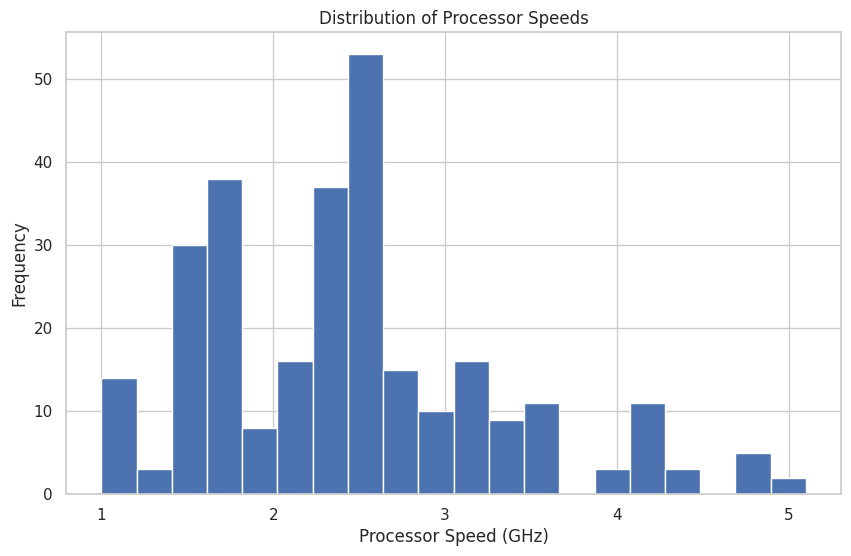

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["Processor Speed (GHz)"].dropna(), bins=20)
plt.xlabel("Processor Speed (GHz)")
plt.ylabel("Frequency")
plt.title("Distribution of Processor Speeds")
plt.show()

Most of the Processor Speeds are between 1.5 to 2.7.

In [ ]:
df["Operating System"].value_counts()

,count
Operating System,
Windows 10 Pro,73
macOS,53
Windows,46
Windows 10,45
Windows 11,25
Windows 11 Pro,17
Windows 10 pro,6
Windows 7,5
Ubuntu,4


#### Colours

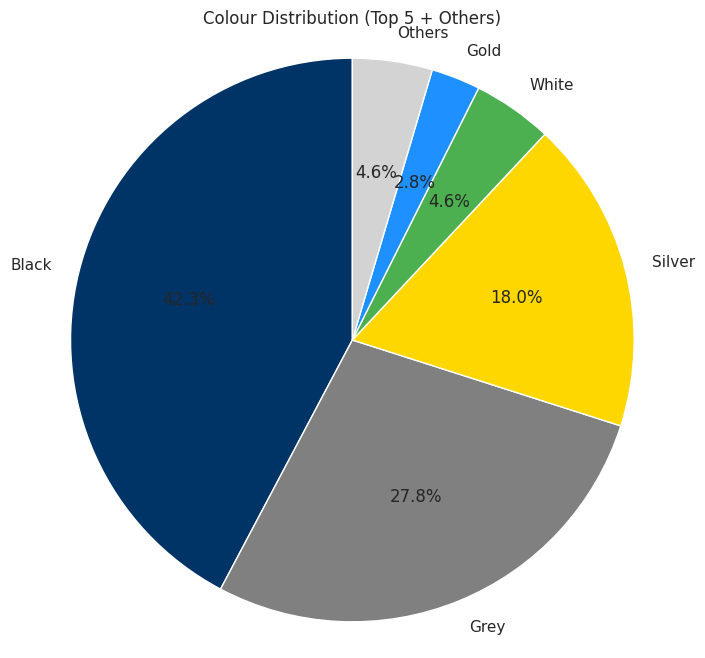

In [ ]:
color_counts = df['Colour'].value_counts()

top_colors = color_counts.nlargest(5)

# Create an 'Others' category for the rest
others_count = color_counts.sum() - top_colors.sum()
top_colors['Others'] = others_count
custom_colors = ['#003366', '#808080', '#FFD700', '#4CAF50', '#1E90FF', '#D3D3D3']
colors_to_use = custom_colors[:len(top_colors)]

plt.figure(figsize=(8, 8))
plt.pie(top_colors, labels=top_colors.index, autopct='%1.1f%%', startangle=90, colors = colors_to_use)
plt.title('Colour Distribution (Top 5 + Others)')
plt.axis('equal')
plt.show()

In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128,8,75000,1920x1080,42,15.6,No
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256,4,99999,1366x768,41,15.6,No
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52,13.4,No
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51,13.3,No
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54,15.6,No
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95,15.6,No


#### SSD & RAM

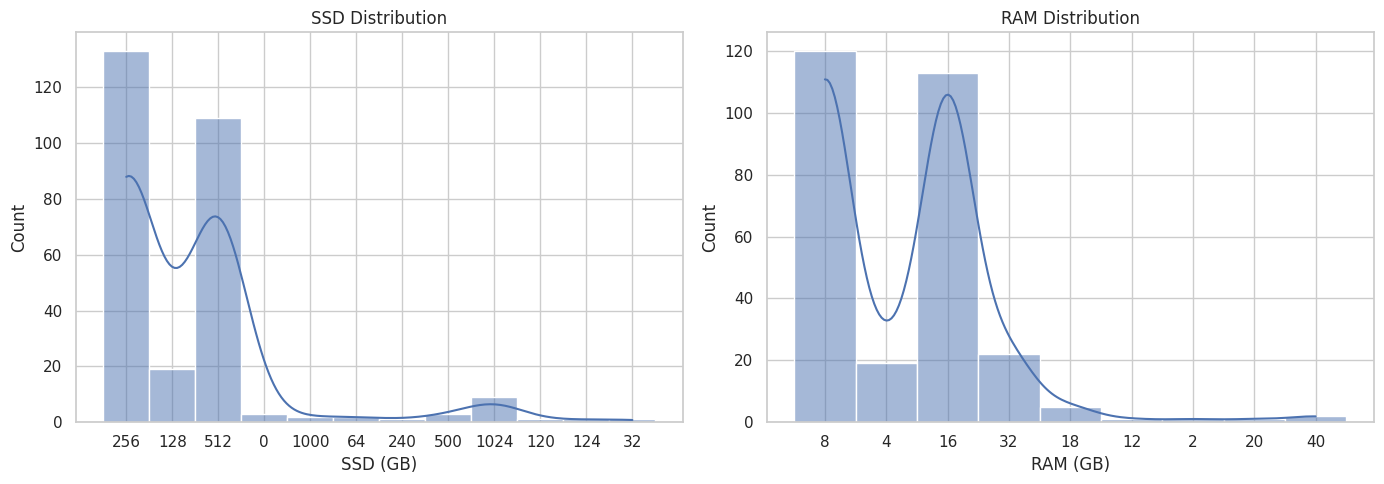

In [ ]:
plt.figure(figsize=(14, 5))

# SSD Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='SSD (GB)', bins=20, kde=True)
plt.title('SSD Distribution')

# RAM Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='RAM (GB)', bins=20, kde=True)
plt.title('RAM Distribution')

plt.tight_layout()
plt.show()

For SSD:
- The SSD distribution shows that the most common storage capacities among the laptops are 256 GB and 512 GB. A large number of laptops are equipped with 256 GB SSDs, which is often sufficient for typical users who store data without needing a massive amount of space.

- The presence of a significant number of laptops with 512 GB SSDs suggests that many users or manufacturers prefer a bit more storage, perhaps for those who require extra space for media files, larger applications, or a few games. Beyond these capacities, very few laptops offer smaller or larger SSDs in this dataset. Low-end sizes like 128 GB or smaller might be limited to budget models, which are less common here, and higher-end sizes like 1 TB are relatively rare, likely because they increase the cost significantly.


For RAM:
- For RAM, the dataset reveals two dominant configurations: 8 GB and 16 GB. The high count of laptops with 8 GB of RAM suggests that this is a standard for entry to mid-level laptops, catering to users who perform everyday tasks like browsing, streaming, and light productivity work.

- Laptops with 16 GB of RAM are also prevalent, indicating that this configuration is popular for users who need more power, such as professionals or students running heavier applications, multitasking more intensely, or even light gaming.
- Laptops offering 32 GB are more specialized, likely targeting power users like gamers, creative professionals, or those using resource-intensive software.

#### Screen Resolution & Size

We analyze the distribution/counts of Screen Resolution and size..

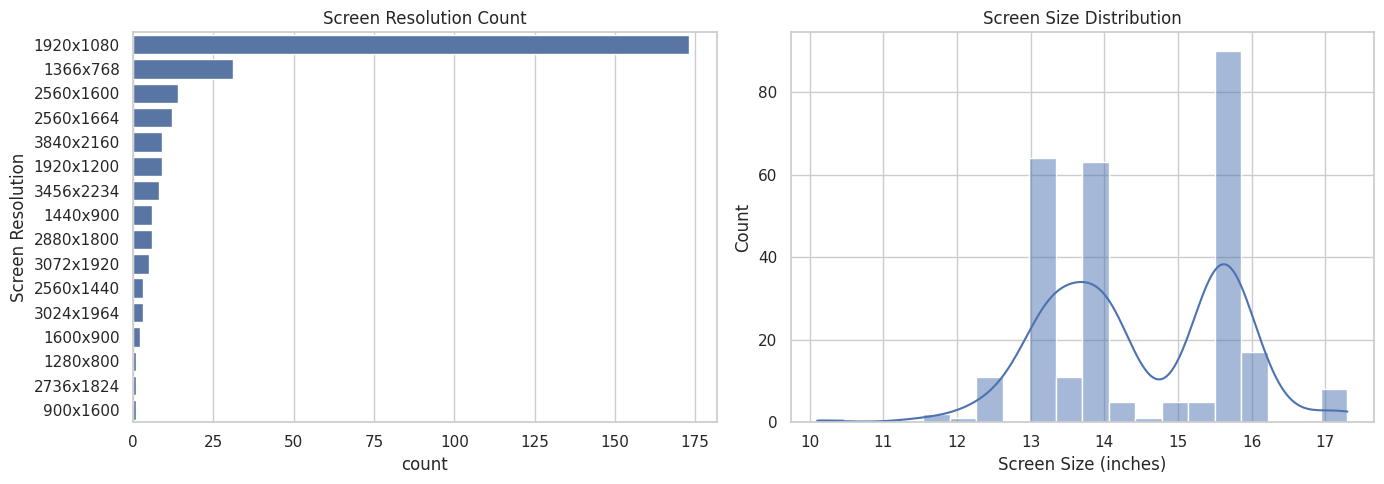

In [ ]:
plt.figure(figsize=(14, 5))

# Screen Resolution Count
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='Screen Resolution', order=df['Screen Resolution'].value_counts().index)
plt.title('Screen Resolution Count')

# Screen Size Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Screen Size (inches)', bins=20, kde=True)
plt.title('Screen Size Distribution')

plt.tight_layout()
plt.show()


**Screen Resolution Count:**
- 1920x1080 resolution is by far the most common, suggesting it’s the standard choice for laptops.
- 1366x768 is also relatively common, likely in budget or smaller-sized laptops.
- Higher resolutions like 2560x1600 and 3840x2160 are less frequent, typically found in premium or specialized models.

**Screen Size Distribution:**
- Screen sizes of 15-16 inches are the most common, indicating a preference for mid-to-large screens.
- Smaller sizes around 13-14 inches are also frequent, likely for more portable laptops.


Let's see which laptops contain the higher resolutions and analyze them..

In [ ]:
# Filter laptops with higher screen resolutions
high_res_laptops = df[df['Screen Resolution'].isin(['2560x1600', '3840x2160'])]

# Summary statistics for selected columns
summary_data = {
    'Metric': ['Model Name', 'RAM (GB)', 'SSD (GB)', 'Processor Type', 'Graphics Card', 'Battery Capacity (Wh)'],
    'Count': [high_res_laptops['Model Name'].count(),
              high_res_laptops['RAM (GB)'].count(),
              high_res_laptops['SSD (GB)'].count(),
              high_res_laptops['Processor Type'].count(),
              high_res_laptops['Graphics Card'].count(),
              high_res_laptops['Battery Capacity (Wh)'].count()],
    'Unique': [high_res_laptops['Model Name'].nunique(),
               high_res_laptops['RAM (GB)'].nunique(),
               high_res_laptops['SSD (GB)'].nunique(),
               high_res_laptops['Processor Type'].nunique(),
               high_res_laptops['Graphics Card'].nunique(),
               high_res_laptops['Battery Capacity (Wh)'].nunique()],
    'Top': [high_res_laptops['Model Name'].mode()[0],
            high_res_laptops['RAM (GB)'].mode()[0],
            high_res_laptops['SSD (GB)'].mode()[0],
            high_res_laptops['Processor Type'].mode()[0],
            high_res_laptops['Graphics Card'].mode()[0],
            high_res_laptops['Battery Capacity (Wh)'].mode()[0]],
    'Frequency': [high_res_laptops['Model Name'].value_counts().iloc[0],
                  high_res_laptops['RAM (GB)'].value_counts().iloc[0],
                  high_res_laptops['SSD (GB)'].value_counts().iloc[0],
                  high_res_laptops['Processor Type'].value_counts().iloc[0],
                  high_res_laptops['Graphics Card'].value_counts().iloc[0],
                  high_res_laptops['Battery Capacity (Wh)'].value_counts().iloc[0]]
}

# Convert the summary dictionary to a DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df

,Metric,Count,Unique,Top,Frequency
0,Model Name,23,15,MacBook Pro M1,4
1,RAM (GB),23,3,16,11
2,SSD (GB),23,5,256,13
3,Processor Type,23,4,i7,9
4,Graphics Card,23,8,Intel Iris Xe Graphics,7
5,Battery Capacity (Wh),23,14,49,4


In [ ]:
# Display processor statistics
processor_distribution = high_res_laptops['Processor Type'].value_counts().reset_index()
processor_distribution.columns = ['Processor Type', 'Count']
print("\nProcessor Distribution in High-Resolution Laptops:")
processor_distribution


Processor Distribution in High-Resolution Laptops:


,Processor Type,Count
0,i7,9
1,M1,7
2,i5,6
3,Not Specified,1


In [ ]:
# Display graphics card statistics
graphics_card_distribution = high_res_laptops['Graphics Card'].value_counts().reset_index()
graphics_card_distribution.columns = ['Graphics Card', 'Count']
print("\nGraphics Card Distribution in High-Resolution Laptops:")
graphics_card_distribution


Graphics Card Distribution in High-Resolution Laptops:


,Graphics Card,Count
0,Intel Iris Xe Graphics,7
1,M1 GPU,7
2,Intel UHD Graphics,3
3,Intel UHD Graphics 617,2
4,Intel Iris Plus Graphics,1
5,Integrated Graphics (Shared 4GB),1
6,NVIDIA Quadro T1000,1
7,NVIDIA GeForce GTX 1650,1


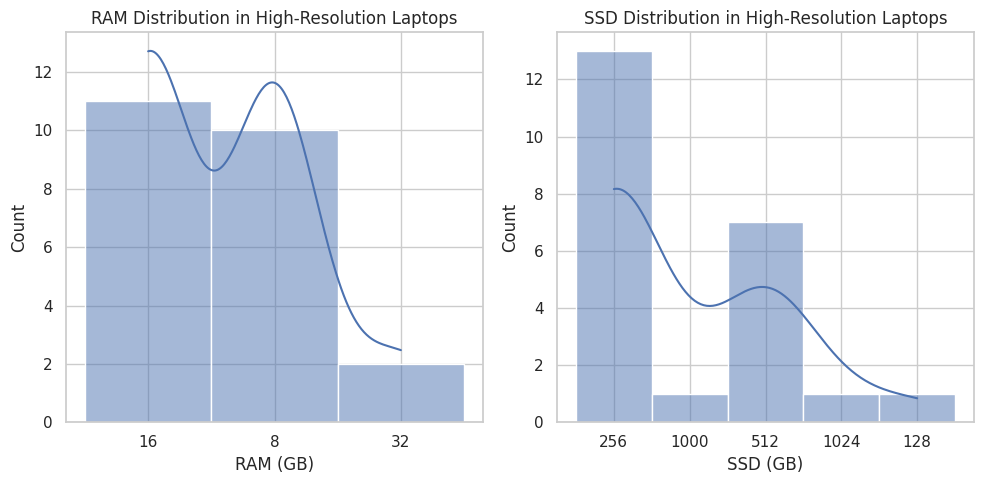

In [ ]:
# Visualize distributions of RAM and SSD for high-resolution laptops
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(high_res_laptops['RAM (GB)'], kde=True)
plt.title('RAM Distribution in High-Resolution Laptops')

plt.subplot(1, 2, 2)
sns.histplot(high_res_laptops['SSD (GB)'], kde=True)
plt.title('SSD Distribution in High-Resolution Laptops')

plt.tight_layout()
plt.show()

- RAM Distribution: The high-resolution laptops show a predominance of 16 GB RAM, with around 12 laptops in this category. There is also a noticeable group of laptops with 8 GB RAM, suggesting that while these laptops are high-resolution, they are still split between mid- to high-tier models in terms of memory.

- SSD Distribution: A large portion of high-resolution laptops come with 256 GB SSDs, followed by those with 512 GB. The distribution indicates that these laptops are geared toward both standard and heavy storage requirements, inaffected by the screen resolution.

#### Battery

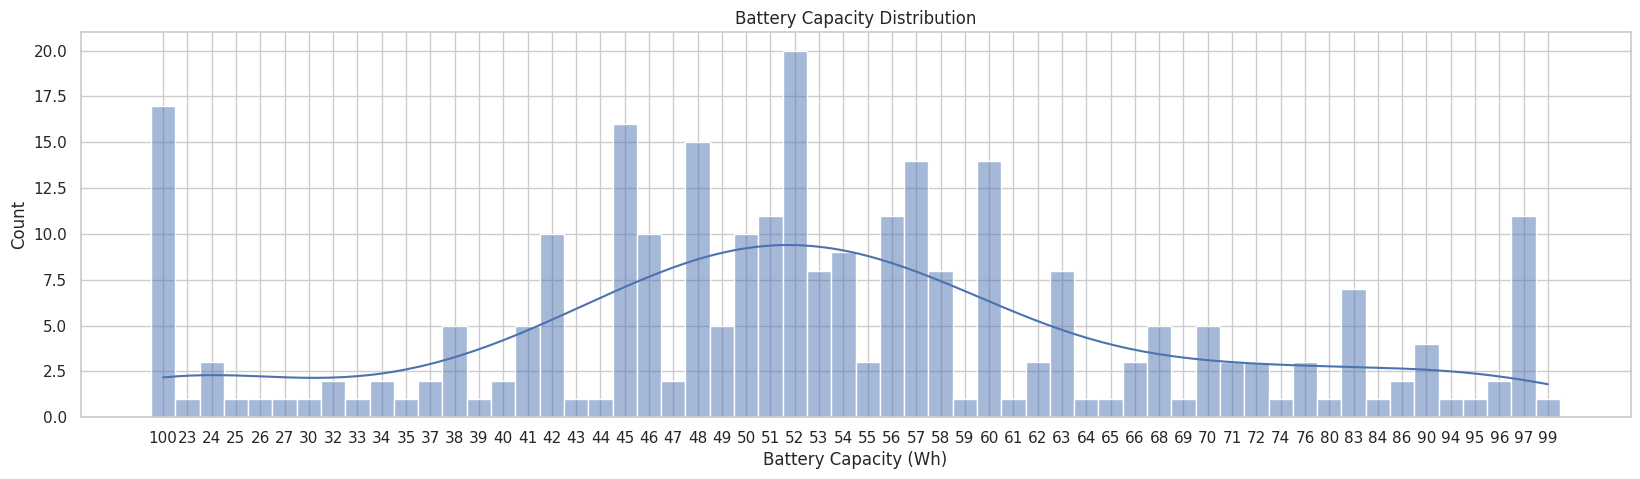

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df.sort_values(by='Battery Capacity (Wh)'), x='Battery Capacity (Wh)', bins=20, kde=True)
plt.title('Battery Capacity Distribution')
plt.show()

The histogram shows a diverse distribution of battery capacities, with a few peaks in the count around specific values. The KDE line (Kernel Density Estimate) reflects the overall trend, showing a slight decline as capacity increases - merely a bell curve. A few high end, gaming laptops for example, possess a battery capacity of 100, differentiating from the overall trend.

#### Touchscreen

First let's visualize how many laptops have a touchscreen..

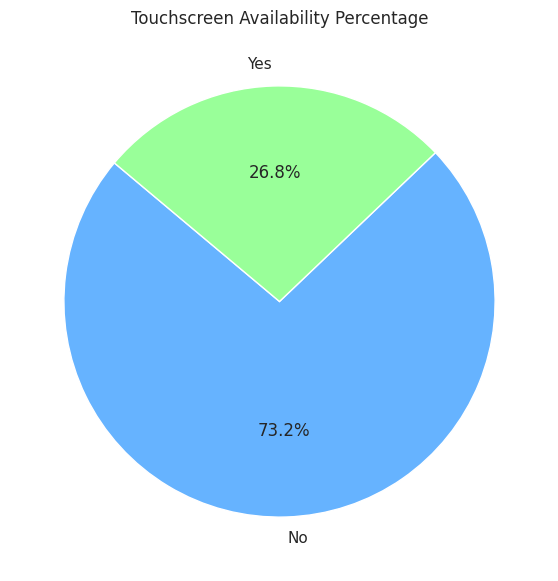

In [ ]:
touchscreen_counts = df['Touchscreen?'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(touchscreen_counts, labels=touchscreen_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Touchscreen Availability Percentage')
plt.show()

As we see,  most laptops don't have a touchscreen. We can understand the distribution of touchscreen laptops by brand..

In [ ]:
brand_touchscreen_counts = df.groupby(['Brand', 'Touchscreen?']).size().unstack(fill_value=0)
brand_touchscreen_counts

Touchscreen?,No,Yes
Brand,,
Acer,10,7
Apple,53,0
Asus,0,3
Dell,57,9
Fujitsu,3,1
HP,40,26
LG,1,1
Lenovo,31,16
MSI,0,2


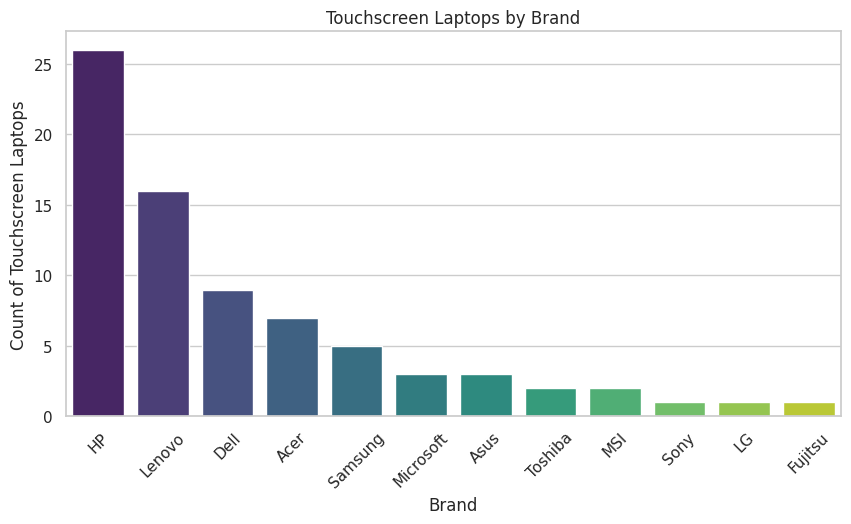

In [ ]:
touchscreen_by_brand = df[df['Touchscreen?'] == 'Yes']['Brand'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=touchscreen_by_brand.index, y=touchscreen_by_brand.values, hue=touchscreen_by_brand.index, palette='viridis', legend=False)
plt.xlabel('Brand')
plt.ylabel('Count of Touchscreen Laptops')
plt.title('Touchscreen Laptops by Brand')
plt.xticks(rotation=45)
plt.show()

 HP has the highest count of touchscreen laptops, followed by Lenovo and Dell. Brands like LG, Sony, and Fujitsu have very few touchscreen models, suggesting that touchscreen functionality may be less prioritized in their product lines.

 Let's analyze further for each brand with no touchscreens which are not accounted for in this diagram...

<Figure size 1200x600 with 0 Axes>

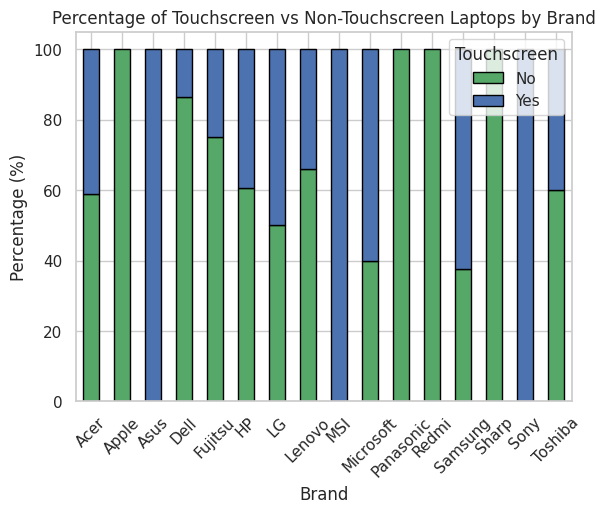

In [ ]:
brand_touchscreen_percentage = brand_touchscreen_counts.div(brand_touchscreen_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
brand_touchscreen_percentage.plot(kind='bar', stacked=True, color=['#55A868', '#4C72B0'], edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Touchscreen vs Non-Touchscreen Laptops by Brand')
plt.xticks(rotation=45)
plt.legend(title='Touchscreen', labels=['No', 'Yes'])
plt.show()

#### Graphics Card

Let's see which graphics card are part of our dataset..

In [ ]:
graphics_card_counts = df['Graphics Card'].value_counts()
graphics_card_counts

,count
Graphics Card,
Intel UHD Graphics,47
Intel UHD Graphics 620,36
Intel Iris Xe Graphics,33
M3 GPU,11
M2 GPU,10
...,...
Intel Graphics 550,1
Intel HD Graphics 400,1
AMD Radeon X1600,1


We have almost 70 different types of graphics card, showing its variability. Let's view the 10 most common graphics card

In [ ]:
graphics_card_counts.head(10)

,count
Graphics Card,
Intel UHD Graphics,47
Intel UHD Graphics 620,36
Intel Iris Xe Graphics,33
M3 GPU,11
M2 GPU,10
AMD Radeon Graphics,9
M1 GPU,7
Intel HD Graphics 4000,7
Integrated Graphics,6


Let's plot the most common graphics card and see their distribution..

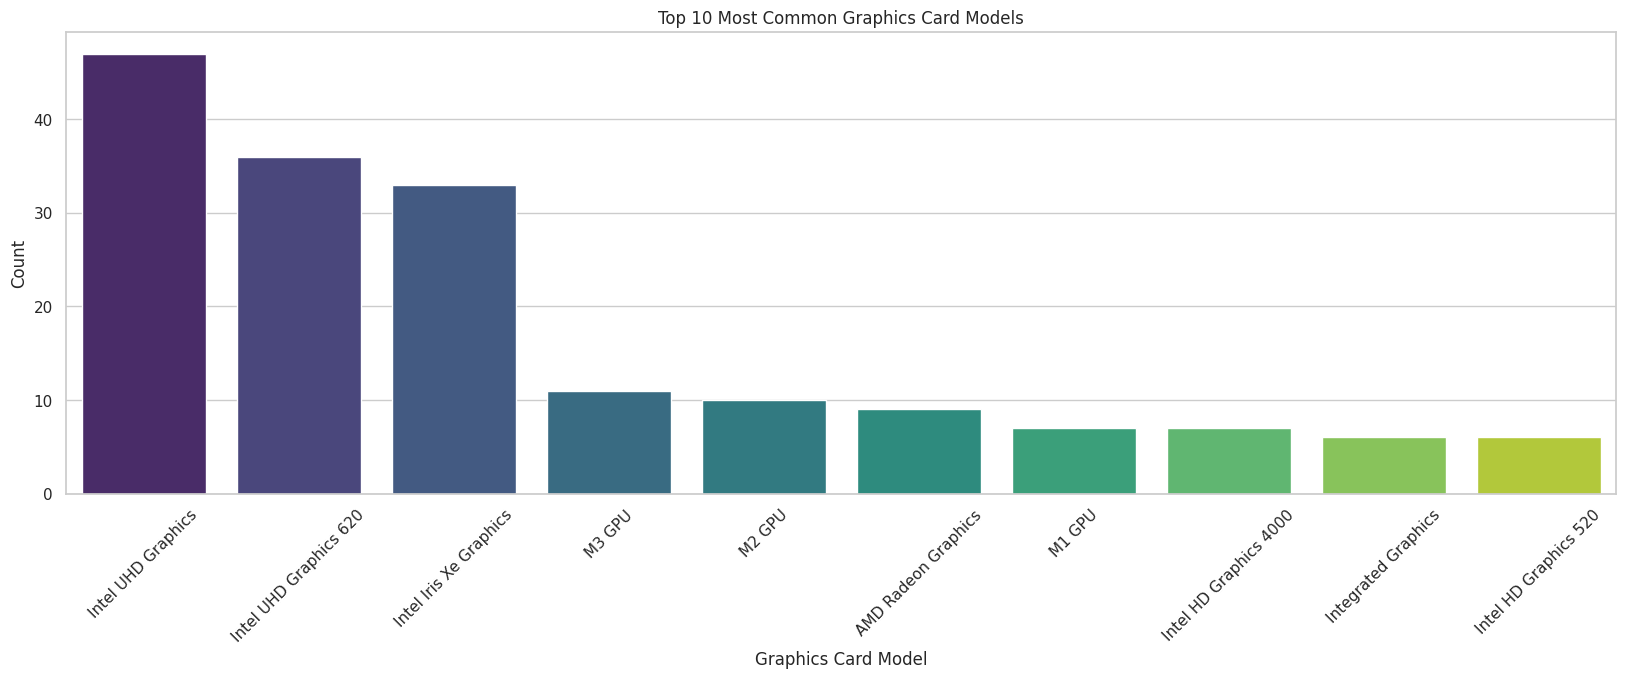

In [ ]:
# Bar plot of the most common graphics cards
plt.figure(figsize=(20, 6))
sns.barplot(x=graphics_card_counts.index[:10], y=graphics_card_counts.values[:10], palette='viridis')
plt.xlabel('Graphics Card Model')
plt.ylabel('Count')
plt.title('Top 10 Most Common Graphics Card Models')
plt.xticks(rotation=45)
plt.show()

Let's plot by the brand now to view which company has the highest share of graphics card in the market.

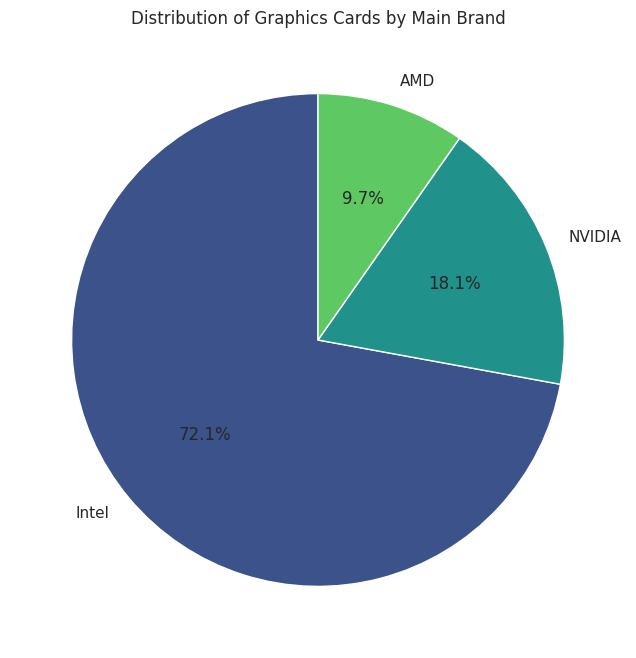

In [ ]:
df['GraphicsCardBrand'] = df['Graphics Card'].apply(lambda x: x.split()[0] if pd.notnull(x) else 'Unknown')

main_brands = ['NVIDIA', 'AMD', 'Intel', 'm3', 'm2', 'm1']
df_main_brands = df[df['GraphicsCardBrand'].isin(main_brands)]
graphics_card_brand_counts = df_main_brands['GraphicsCardBrand'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(graphics_card_brand_counts.values, labels=graphics_card_brand_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(graphics_card_brand_counts)))
plt.title('Distribution of Graphics Cards by Main Brand')
plt.show()

As we see, Intel possesses the highest market share for graphics card followed by NVIDIA and AMD, which then bring Mac graphics cards for their respective laptop models.

## **Part 3: Model Training**

Since our model comes more off under prediction, rather than classification, we focus on prediction models in this part of the notebook.

#### Setting up for model training

In [ ]:
df.columns

Index(['Brand', 'Model Name', 'Manufacture Year', 'Laptop Type',
       'Processor Generation', 'Processor Type', 'Processor Speed (GHz)',
       'Operating System', 'Colour', 'Graphics Card', 'SSD (GB)', 'RAM (GB)',
       'Price (PKR)', 'Screen Resolution', 'Battery Capacity (Wh)',
       'Screen Size (inches)', 'Touchscreen?', 'GraphicsCardBrand'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?,GraphicsCardBrand
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,1920x1080,48,14.0,No,Graphics
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128,8,75000,1920x1080,42,15.6,No,Intel
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1366x768,49,12.5,No,Intel
4,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256,4,99999,1366x768,41,15.6,No,Intel
5,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,1920x1080,24,13.3,Yes,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,1920x1200,52,13.4,No,Intel
293,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,1920x1080,51,13.3,No,Intel
295,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,1920x1080,54,15.6,No,Intel
296,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Grey,Intel Mobile Graphics WM590,512,32,275000,1920x1080,95,15.6,No,Intel


In [ ]:
df["Screen Resolution"]=df["Screen Resolution"].apply(
    lambda x: int(x.split('x')[0])*int(x.split('x')[1])
) #converting screen resolution to numerical

In [ ]:
df["Graphics Card"].value_counts() #should not one hot encode this as too many different values

,count
Graphics Card,
Intel UHD Graphics,47
Intel UHD Graphics 620,36
Intel Iris Xe Graphics,33
M3 GPU,11
M2 GPU,10
...,...
Intel Graphics 550,1
Intel HD Graphics 400,1
AMD Radeon X1600,1


In [ ]:
df["Model Name"].value_counts() #no use in our model

,count
Model Name,
MacBook Pro,14
MacBook Air,8
MacBook Pro M1,7
MacBook M3 Pro,5
MacBook M3 Air,5
...,...
650 G9 Elite Book,1
OMEN 16-b0013dx,1
ZBook 15u G3,1


In [ ]:
df=df.reset_index().drop("index",axis=1)

In [ ]:
df

,Brand,Model Name,Manufacture Year,Laptop Type,Processor Generation,Processor Type,Processor Speed (GHz),Operating System,Colour,Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?,GraphicsCardBrand
0,HP,640 G5 Probook,2019.0,Laptop,8,i5,1.6,Windows,Silver,Graphics (4GB),256,8,54000,2073600,48,14.0,No,Graphics
1,HP,Pavilion 15-cc120TX,2017.0,Pavilion Series,8,i5,1.6,Windows,Silver,Intel UHD Graphics,128,8,75000,2073600,42,15.6,No,Intel
2,HP,EliteBook 820 G4,2017.0,Laptop,7,i5,2.5,Windows,White,Intel UHD Graphics 620,256,8,47000,1049088,49,12.5,No,Intel
3,HP,HP i3 12th Gen (grey),2022.0,Others,12,i3,1.2,DOS,Grey,Intel UHD Graphics,256,4,99999,1049088,41,15.6,No,Intel
4,HP,Elite DragonFly,2019.0,Elite book,11,i5,4.2,Windows,Blue,Intel UHD Graphics 620,256,16,120000,2073600,24,13.3,Yes,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Dell,XPS 13 9310,2020.0,Tiger Lake,11,i5,2.4,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,8,131900,2304000,52,13.4,No,Intel
280,Dell,XPS 13 7390,2019.0,Comet Lake,10,i7,1.1,Windows 10 Pro,Silver,Intel UHD Graphics,512,16,140000,2073600,51,13.3,No,Intel
281,Dell,Latitude 15 5540,2023.0,Raptor Lake,13,i5,1.6,Windows 10 Pro,Silver,Intel Iris Xe Graphics,512,16,158500,2073600,54,15.6,No,Intel
282,Dell,Precision 15 7560,2022.0,Tiger Lake,11,i7,2.5,Windows 10 Pro,Grey,Intel Mobile Graphics WM590,512,32,275000,2073600,95,15.6,No,Intel


#### OLS Model

We first one-hot encode our categorical columns for OLS model..

In [ ]:
# Specify the categorical columns to be encoded
categorical_columns=['Brand', 'Laptop Type','Processor Type','Operating System','Colour','GraphicsCardBrand',"Touchscreen?"]

encoder=OneHotEncoder(sparse_output=False)
encoded_df=encoder.fit_transform(df[categorical_columns])
encoded_df=pd.DataFrame(encoded_df,columns=encoder.get_feature_names_out(categorical_columns))
encoded_df
df=pd.concat([df,encoded_df],axis=1)
df.drop(categorical_columns,axis=1,inplace=True)
df

,Model Name,Manufacture Year,Processor Generation,Processor Speed (GHz),Graphics Card,SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),...,GraphicsCardBrand_AMD,GraphicsCardBrand_Graphics,GraphicsCardBrand_Integrated,GraphicsCardBrand_Intel,GraphicsCardBrand_M1,GraphicsCardBrand_M2,GraphicsCardBrand_M3,GraphicsCardBrand_NVIDIA,Touchscreen?_No,Touchscreen?_Yes
0,640 G5 Probook,2019.0,8,1.6,Graphics (4GB),256,8,54000,2073600,48,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Pavilion 15-cc120TX,2017.0,8,1.6,Intel UHD Graphics,128,8,75000,2073600,42,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,EliteBook 820 G4,2017.0,7,2.5,Intel UHD Graphics 620,256,8,47000,1049088,49,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,HP i3 12th Gen (grey),2022.0,12,1.2,Intel UHD Graphics,256,4,99999,1049088,41,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Elite DragonFly,2019.0,11,4.2,Intel UHD Graphics 620,256,16,120000,2073600,24,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,XPS 13 9310,2020.0,11,2.4,Intel Iris Xe Graphics,512,8,131900,2304000,52,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
280,XPS 13 7390,2019.0,10,1.1,Intel UHD Graphics,512,16,140000,2073600,51,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
281,Latitude 15 5540,2023.0,13,1.6,Intel Iris Xe Graphics,512,16,158500,2073600,54,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
282,Precision 15 7560,2022.0,11,2.5,Intel Mobile Graphics WM590,512,32,275000,2073600,95,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df["Price (PKR)"]=df["Price (PKR)"].astype(int)

In [ ]:
df_encoded=df.drop(["Model Name", "Graphics Card"], axis=1)

In [ ]:
df.shape

(284, 106)

In [ ]:
X=df_encoded.drop('Price (PKR)', axis=1)
y=df_encoded[['Price (PKR)']]

# Converting any boolean columns (one-hot encoded columns) to integers
bool_columns=X.select_dtypes(include=['bool']).columns
X[bool_columns]=X[bool_columns].astype(int)
scaler=StandardScaler() # Feature scaling
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

##### Initial

In [ ]:
print(X_scaled_df.dtypes)
print(y.dtypes)


Manufacture Year            float64
Processor Generation        float64
Processor Speed (GHz)       float64
SSD (GB)                    float64
RAM (GB)                    float64
                             ...   
GraphicsCardBrand_M2        float64
GraphicsCardBrand_M3        float64
GraphicsCardBrand_NVIDIA    float64
Touchscreen?_No             float64
Touchscreen?_Yes            float64
Length: 103, dtype: object
Price (PKR)    int64
dtype: object


In [ ]:
import statsmodels.api as sm
import pandas as pd

X_const=sm.add_constant(X_scaled_df)

ols_model=sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            Price (PKR)   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     21.36
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           7.74e-66
Time:                        18:34:47   Log-Likelihood:                -3355.0
No. Observations:                 284   AIC:                             6898.
Df Residuals:                     190   BIC:                             7241.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

We're able to view our initial OLS model results focusing on a huge number of variables (284) due to one-hot encoding. We shortern it down to make our training more accurate. Our R^2 is pretty decent of 0.913 with less skewness as well.

##### Concentrated based on p-value threshold

In [ ]:
# Filter significant variables based on p-value threshold
significant_vars=ols_model.pvalues[ols_model.pvalues<0.05].index
print("Significant variables:", significant_vars)

# Create a new model with only significant variables
X_const=sm.add_constant(X)
X_significant=X_const[significant_vars]
X_significant=X_significant.apply(pd.to_numeric,errors='coerce')

ols_model_significant=sm.OLS(y,X_significant).fit()
print(ols_model_significant.summary())

Significant variables: Index(['const', 'Manufacture Year', 'SSD (GB)', 'RAM (GB)', 'Brand_Microsoft',
       'Laptop Type_Ideapad', 'Laptop Type_OMEN', 'Laptop Type_Tiger Lake',
       'Processor Type_M1 Pro', 'Processor Type_M2 Pro', 'Processor Type_M3',
       'Processor Type_M3 Pro', 'Processor Type_i5', 'Processor Type_i7',
       'Processor Type_intel (R) Core (TM) ultra 7 155H 3.80GHz',
       'Operating System_Windows', 'Operating System_Windows 10 Pro',
       'Colour_Platinum', 'GraphicsCardBrand_Intel', 'GraphicsCardBrand_M1',
       'GraphicsCardBrand_M2'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            Price (PKR)   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     82.99
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.97e-101
Time:   

We narrow down the most significant varabiales effect on our laptop prices. Our R^2 goes down a bit to 0.863 however, mostly because we might have still removed a few loosely related significant variables.

#### Training through 5 different models

We evaluate over 4 different models, excluding OLS previously over 4 different train-test splits and hyperparameters to ensure we see the whole picture of our data, and how it performs under different restrictions and conditions.

In [ ]:
def train_evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    rmse=sqrt(mean_squared_error(y_test, predictions))
    print(f'{model_name} RMSE: {rmse:.2f}')
    return predictions, rmse


In [ ]:
import warnings
warnings.filterwarnings("ignore")

##### Lasso

We iterate over different number of iterations and alpha values for a diverse and non-biased amount of data for us to choose our best model..


Train-Test Split: 90%-10%


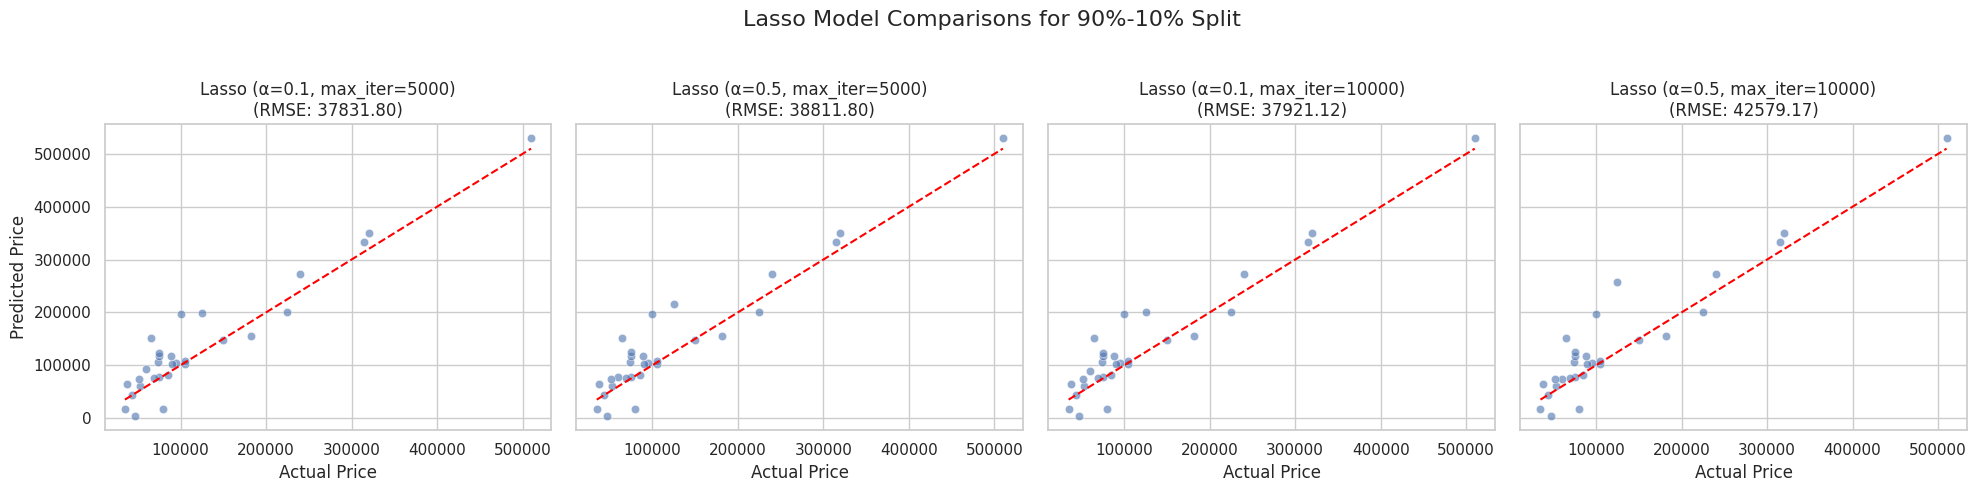


Train-Test Split: 70%-30%


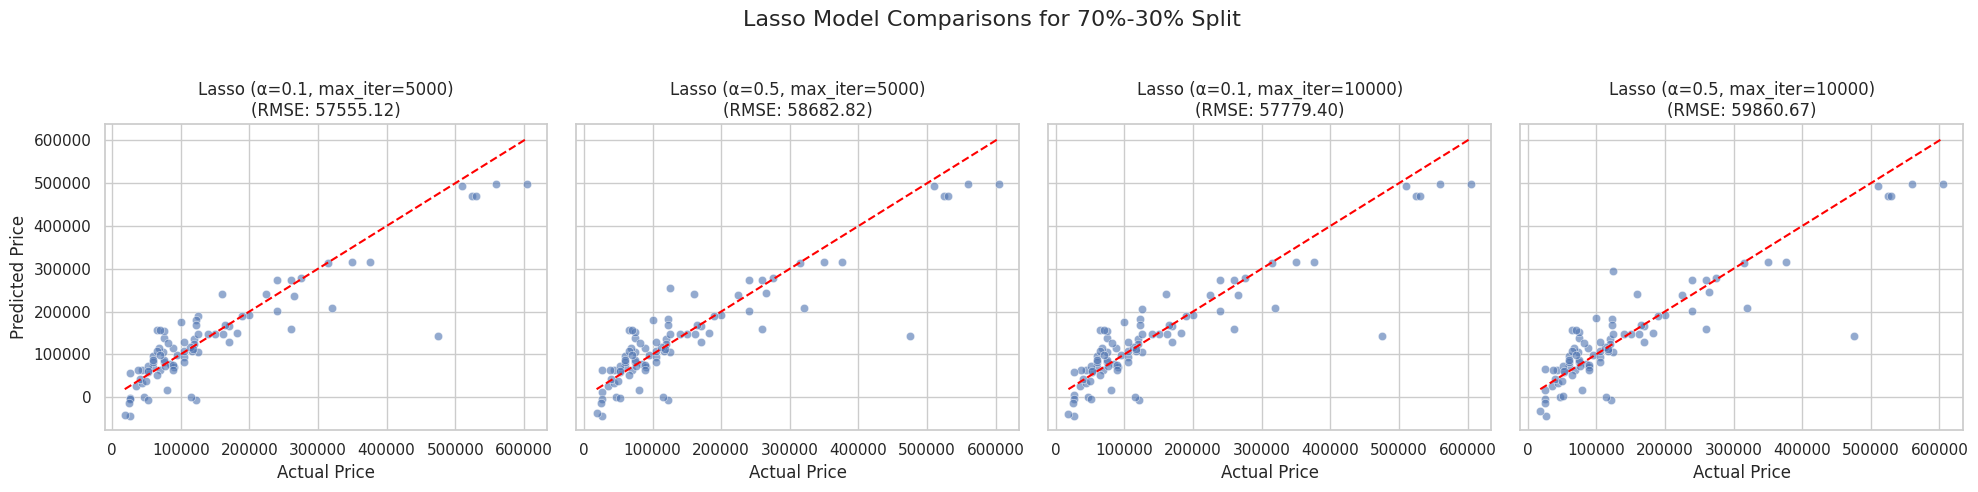


Train-Test Split: 50%-50%


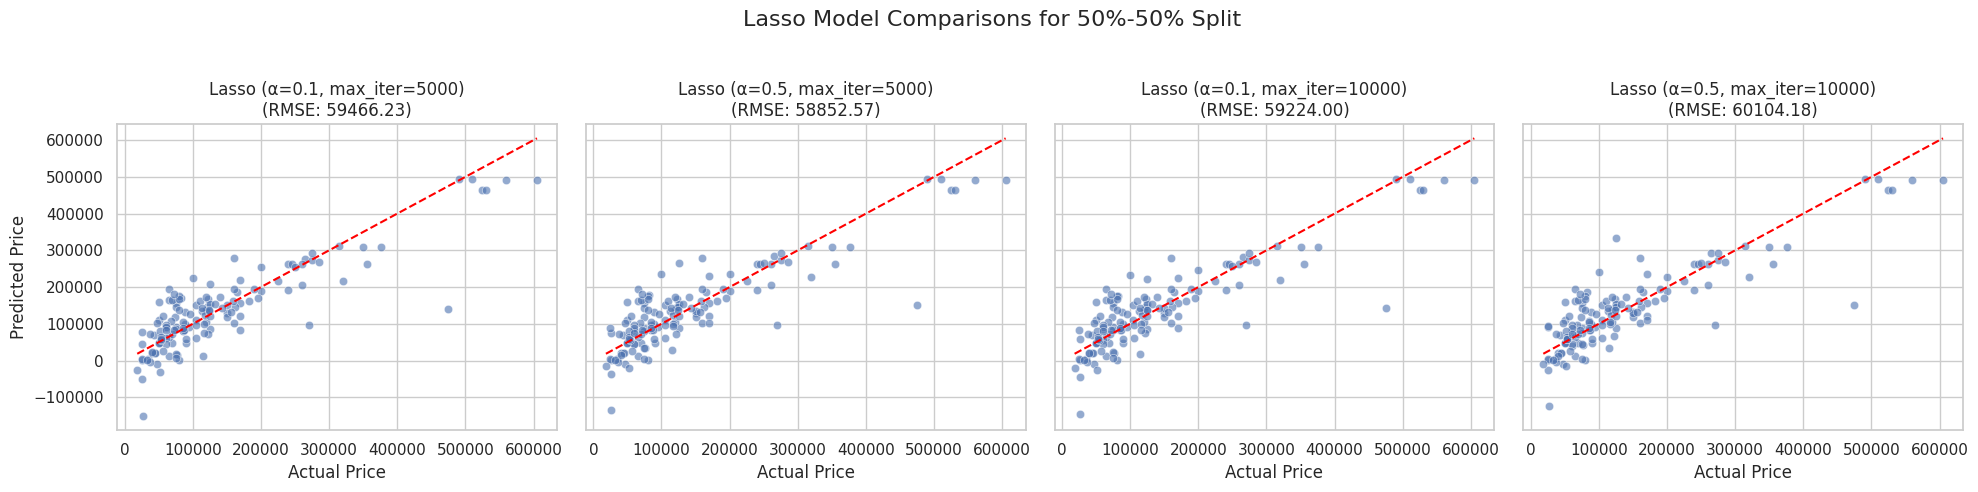


Train-Test Split: 75%-25%


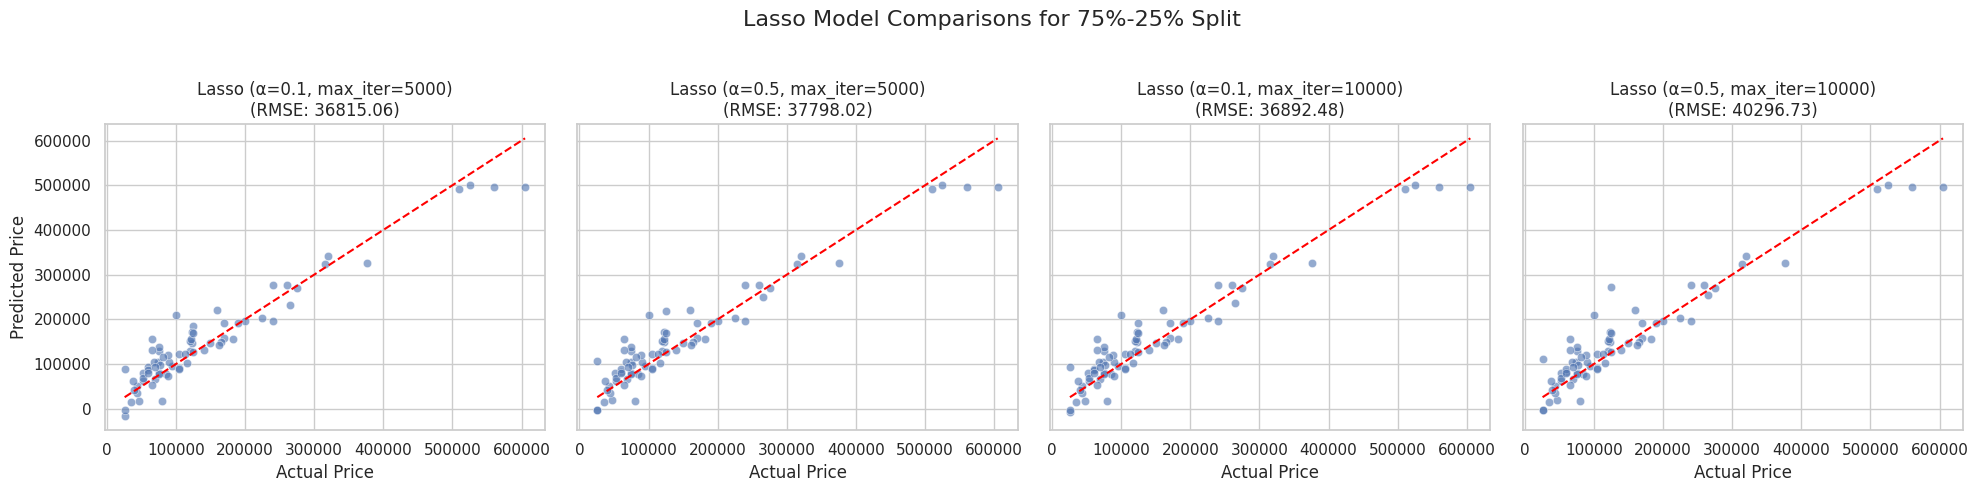

In [ ]:
splits=[(0.9,0.1),(0.7,0.3),(0.5,0.5),(0.75, 0.25)]

# Lasso configurations
lasso_models = {
    'Lasso (α=0.1, max_iter=5000)':Lasso(alpha=0.1, max_iter=5000),
    'Lasso (α=0.5, max_iter=5000)':Lasso(alpha=0.5, max_iter=5000),
    'Lasso (α=0.1, max_iter=10000)':Lasso(alpha=0.1, max_iter=10000),
    'Lasso (α=0.5, max_iter=10000)':Lasso(alpha=0.5, max_iter=10000),
}
for train_size, test_size in splits:
    print(f'\nTrain-Test Split: {int(train_size*100)}%-{int(test_size*100)}%')
    X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=train_size, random_state=42)

    fig, axes=plt.subplots(1,len(lasso_models),figsize=(20, 5), sharey=True)
    fig.suptitle(f'Lasso Model Comparisons for {int(train_size*100)}%-{int(test_size*100)}% Split', fontsize=16)

    for i, (model_name, model) in enumerate(lasso_models.items()):
        model.fit(X_train, y_train)
        predictions= model.predict(X_test)
        rmse= mean_squared_error(y_test,predictions, squared=False)
        y_test_flat= y_test.values.ravel() if y_test.ndim>1 else y_test
        predictions_flat= predictions.ravel() if predictions.ndim>1 else predictions

        ax=axes[i]
        sns.scatterplot(x=y_test_flat, y=predictions_flat, alpha=0.6, ax=ax)
        ax.plot([min(y_test_flat), max(y_test_flat)], [min(y_test_flat),max(y_test_flat)], color='red', linestyle='--')
        ax.set_title(f'{model_name}\n(RMSE: {rmse:.2f})')
        ax.set_xlabel('Actual Price')
        if i == 0:
            ax.set_ylabel('Predicted Price')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Most effective model for Lasso is with **`alpha` of 0.1 and `max_iter` of 5000 over the `train-test split` of 75%-25% with an `RMSE` of 36815.06**

##### Ridge Regression

We iterate over different alpha values for diverse results..


Train-Test Split: 90%-10%


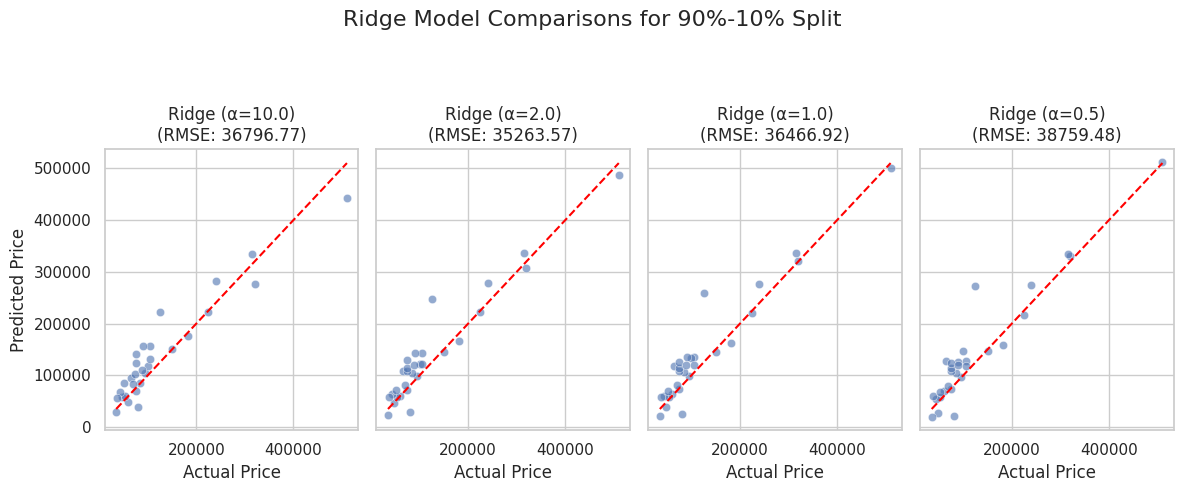


Train-Test Split: 70%-30%


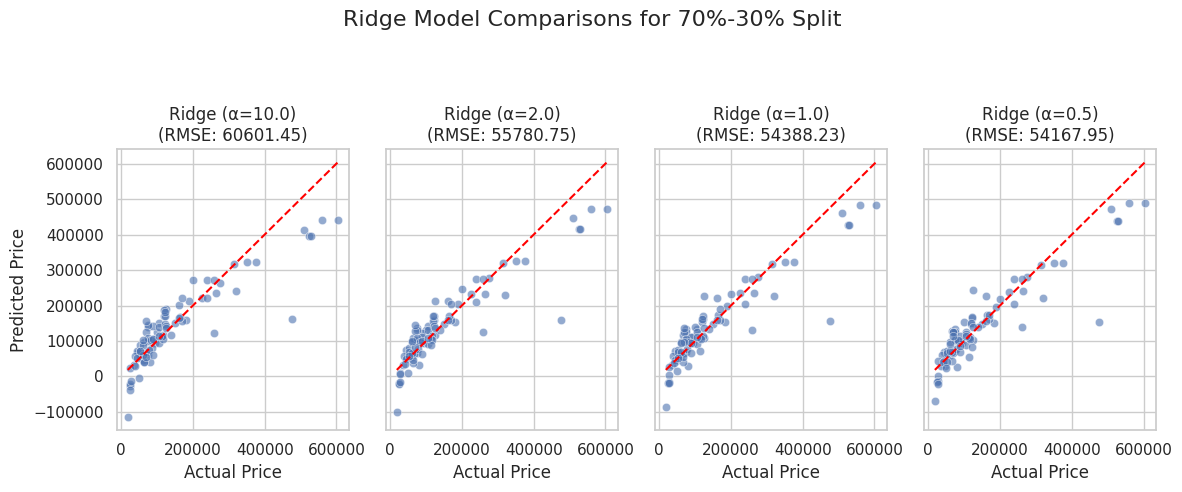


Train-Test Split: 50%-50%


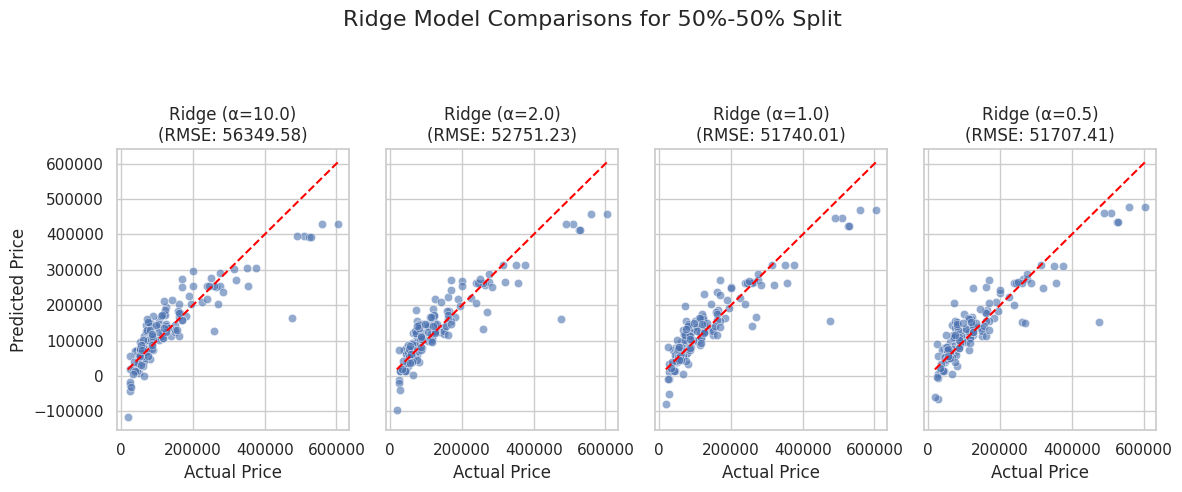


Train-Test Split: 75%-25%


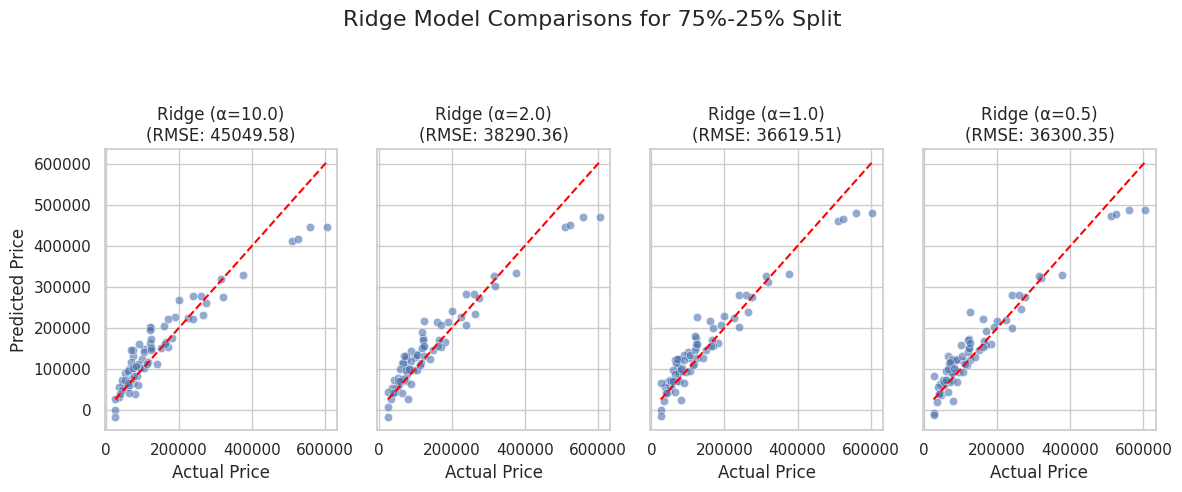

In [ ]:
splits=[(0.9, 0.1), (0.7, 0.3), (0.5, 0.5), (0.75, 0.25)]

# Ridge configurations
ridge_models={
    'Ridge (α=10.0)':Ridge(alpha=10.0),
    'Ridge (α=2.0)':Ridge(alpha=2.0),
    'Ridge (α=1.0)':Ridge(alpha=1.0),
    'Ridge (α=0.5)':Ridge(alpha=0.5),
}

for train_size,test_size in splits:
    print(f'\nTrain-Test Split: {int(train_size*100)}%-{int(test_size*100)}%')
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=train_size,random_state=42)

    fig,axes=plt.subplots(1,len(ridge_models),figsize=(12, 5),sharey=True)
    fig.suptitle(f'Ridge Model Comparisons for {int(train_size*100)}%-{int(test_size*100)}% Split',fontsize=16)

    for i, (model_name, model) in enumerate(ridge_models.items()):
        model.fit(X_train,y_train)
        predictions=model.predict(X_test)
        rmse=mean_squared_error(y_test, predictions, squared=False)
        y_test_flat = y_test.values.ravel() if hasattr(y_test, "values") else y_test.ravel()
        predictions_flat = predictions.ravel()

        ax=axes[i]
        sns.scatterplot(x=y_test_flat,y=predictions_flat,alpha=0.6, ax=ax)
        ax.plot([min(y_test_flat),max(y_test_flat)],[min(y_test_flat),max(y_test_flat)],color='red',linestyle='--')
        ax.set_title(f'{model_name}\n(RMSE: {rmse:.2f})')
        ax.set_xlabel('Actual Price')
        if i == 0:
            ax.set_ylabel('Predicted Price')

    plt.tight_layout(rect=[0,0,1,0.9])
    plt.show()


Most effective model for Ridge is with **`alpha` of 2.0 over the `train-test split` of 90%-10% with an `RMSE` of 35263.57**

##### Decision Tree


Train-Test Split: 90%-10%


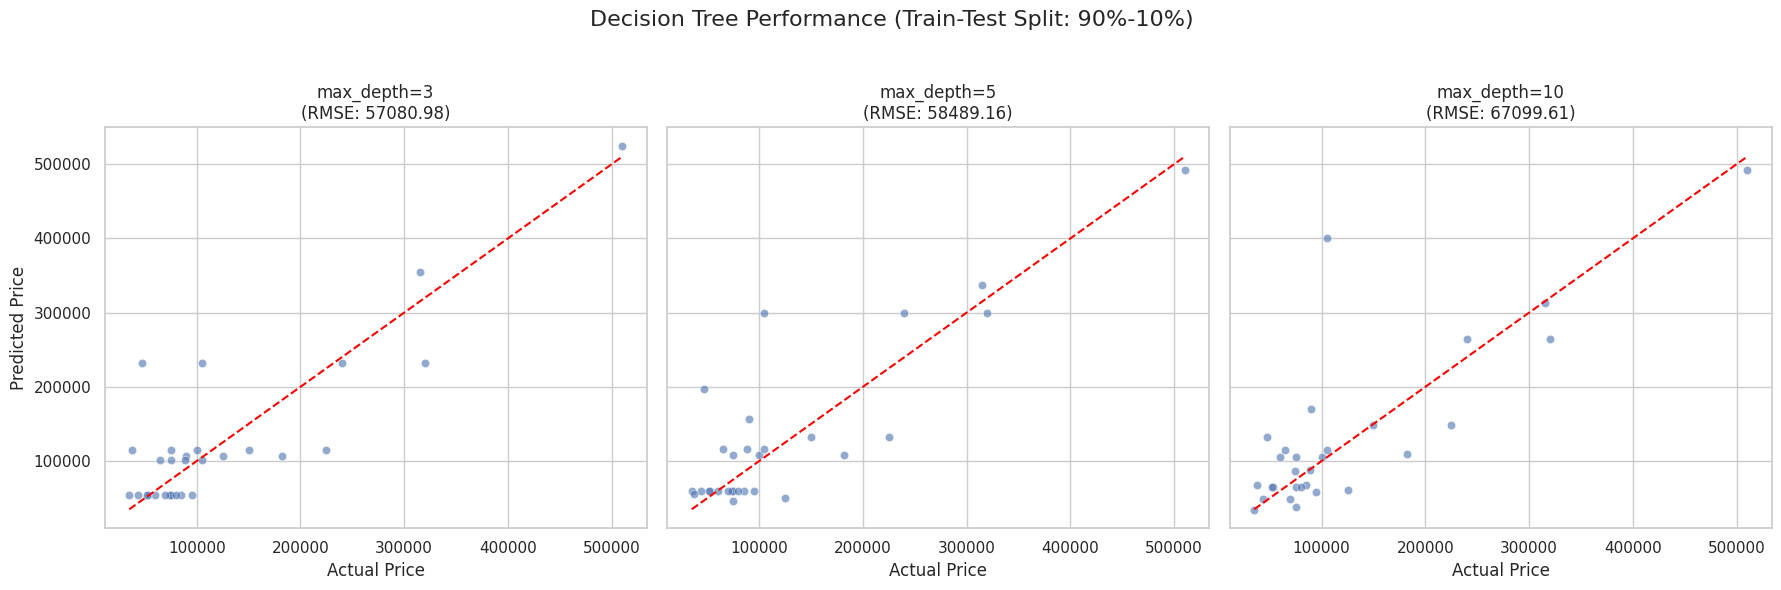


Train-Test Split: 70%-30%


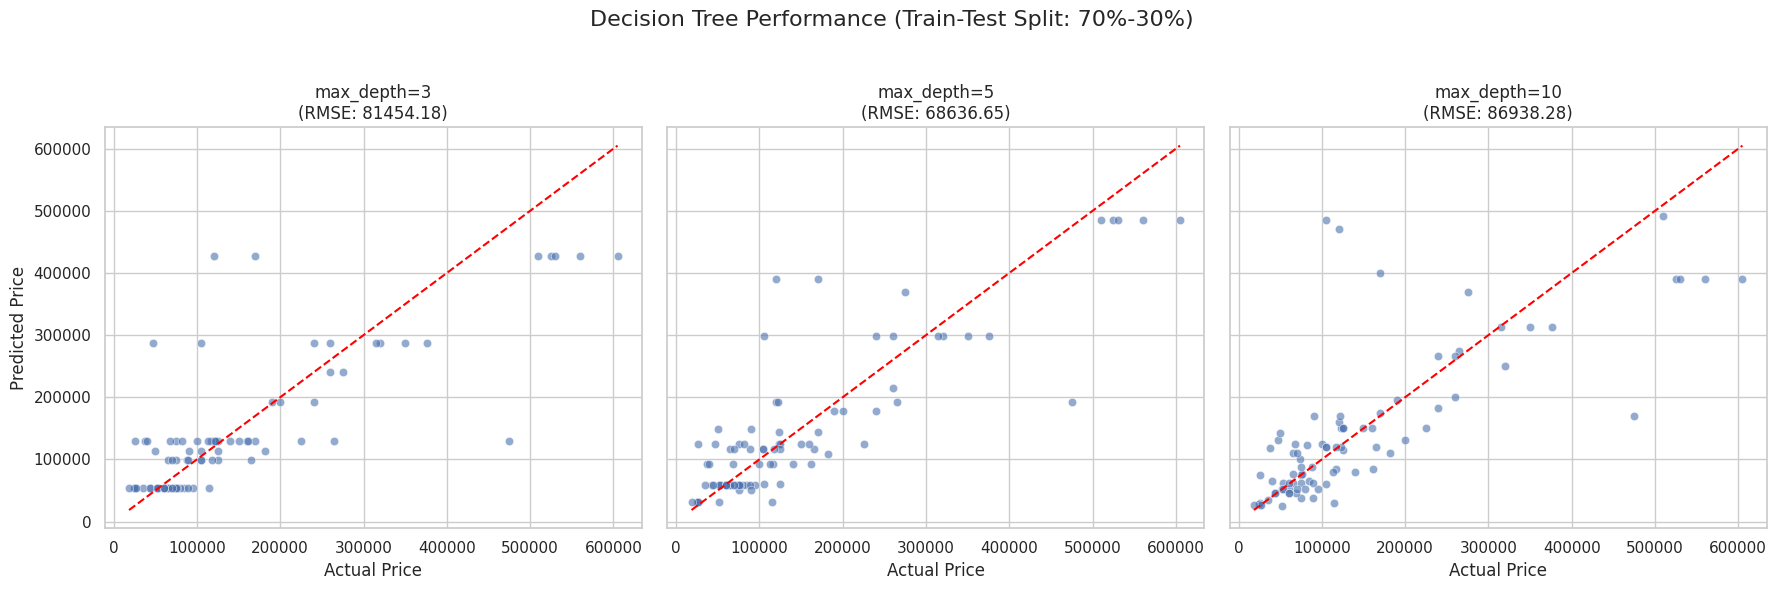


Train-Test Split: 50%-50%


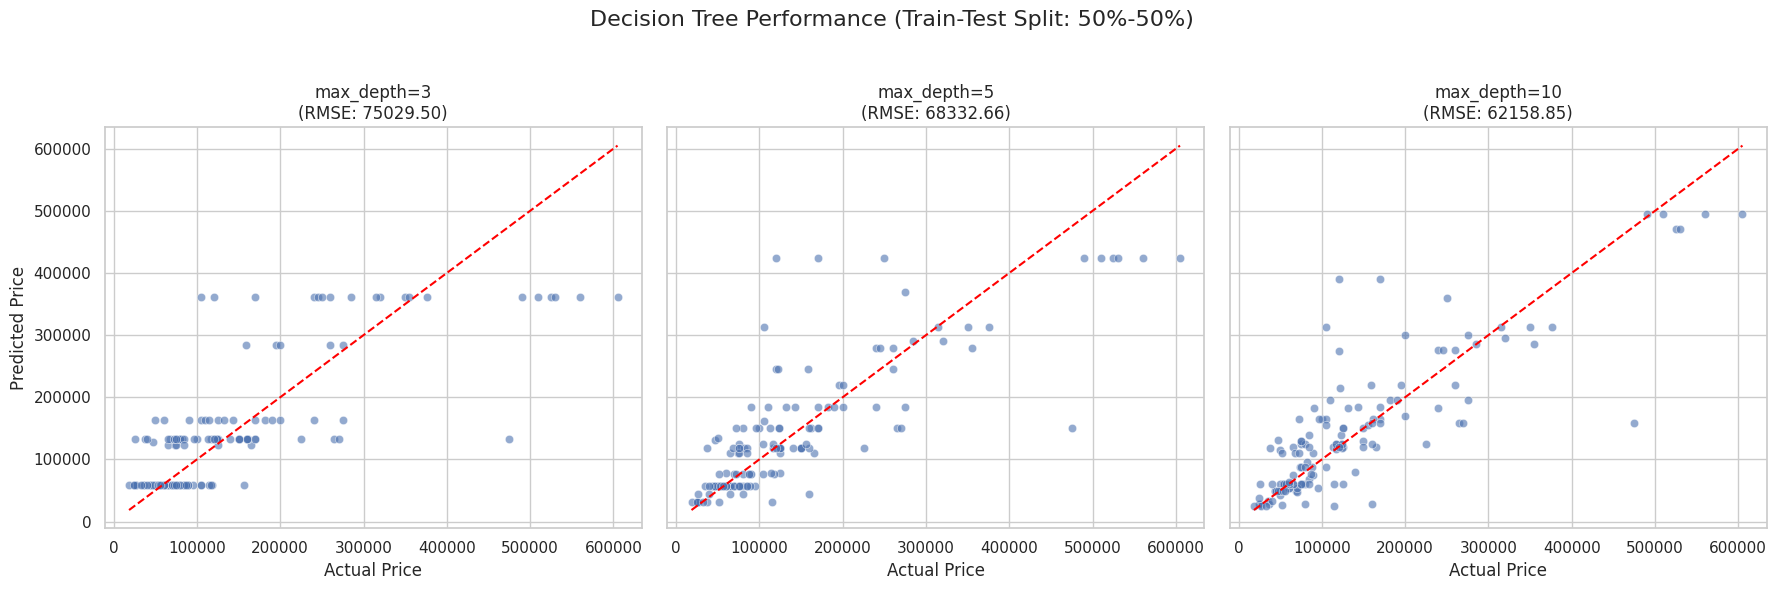


Train-Test Split: 75%-25%


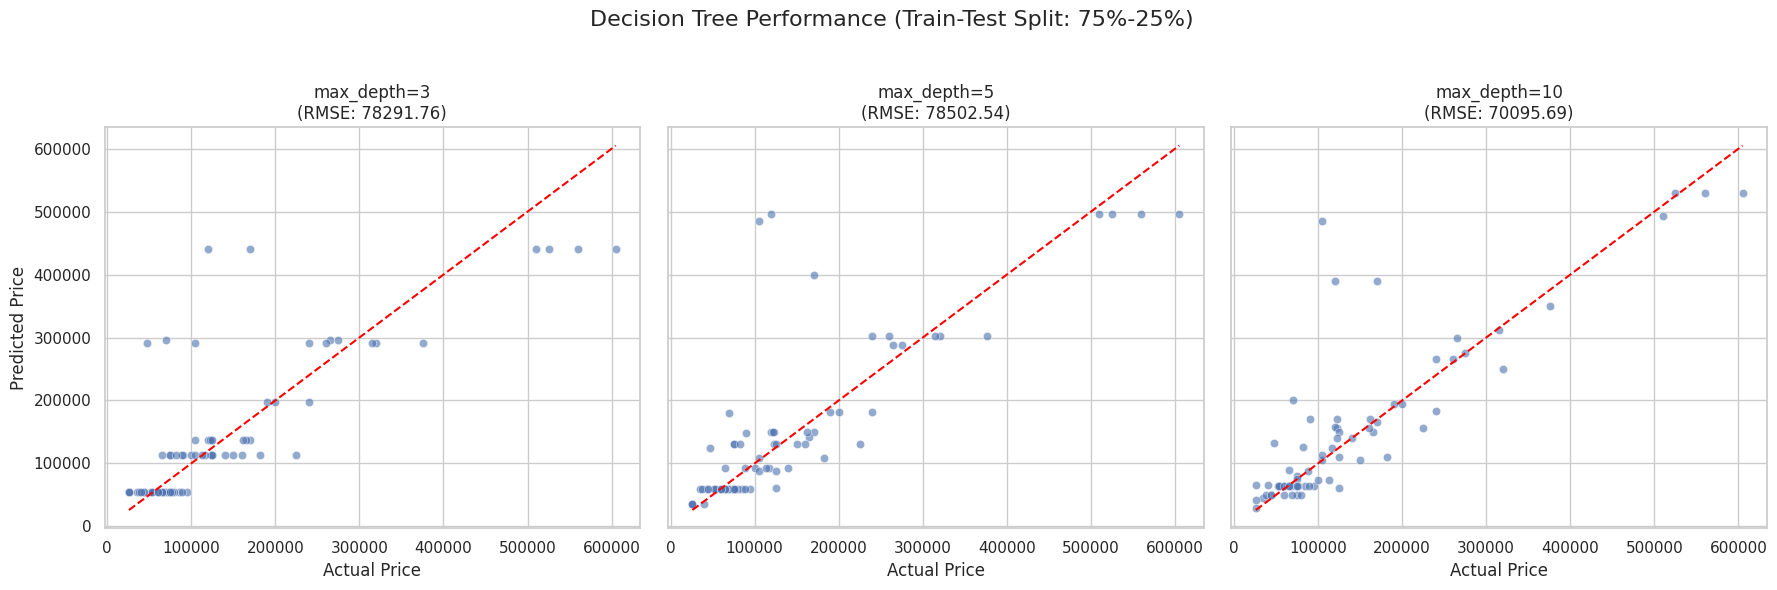

In [ ]:
splits = [(0.9,0.1), (0.7,0.3), (0.5,0.5), (0.75,0.25)]
max_depth_values = [3, 5, 10]

for train_size, test_size in splits:
    print(f'\nTrain-Test Split: {int(train_size * 100)}%-{int(test_size * 100)}%')
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=train_size,random_state=42)
    fig, axes=plt.subplots(1,len(max_depth_values),figsize=(18, 6), sharey=True)
    fig.suptitle(f'Decision Tree Performance (Train-Test Split: {int(train_size * 100)}%-{int(test_size * 100)}%)', fontsize=16)

    for i, max_depth in enumerate(max_depth_values):
        dt_model=DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        dt_model.fit(X_train,y_train)
        predictions=dt_model.predict(X_test)
        rmse=mean_squared_error(y_test, predictions, squared=False)

        # Flatten y_test and predictions for plotting
        y_test_flat=y_test.values.ravel() if hasattr(y_test, "values") else y_test.ravel()
        predictions_flat=predictions.ravel()

        # Plot predicted vs actual values
        ax=axes[i]
        sns.scatterplot(x=y_test_flat,y=predictions_flat,alpha=0.6, ax=ax)
        ax.plot([min(y_test_flat), max(y_test_flat)],[min(y_test_flat), max(y_test_flat)], color='red', linestyle='--')
        ax.set_title(f'max_depth={max_depth}\n(RMSE: {rmse:.2f})')
        ax.set_xlabel('Actual Price')
        if i == 0:
            ax.set_ylabel('Predicted Price')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



Decision Tree gives quite high RMSE's throughout and quite variable results with low RMSE of **60,000** sometimes over a `max_depth` of 10 and sometimes around **80,000**. Hence, it is fair to assume that decision tree is not the best model for us as it overfits over our dataset.

##### Random Forest

We iterate over different `max_depths` like we did for Decision Trees


Train-Test Split: 90%-10%


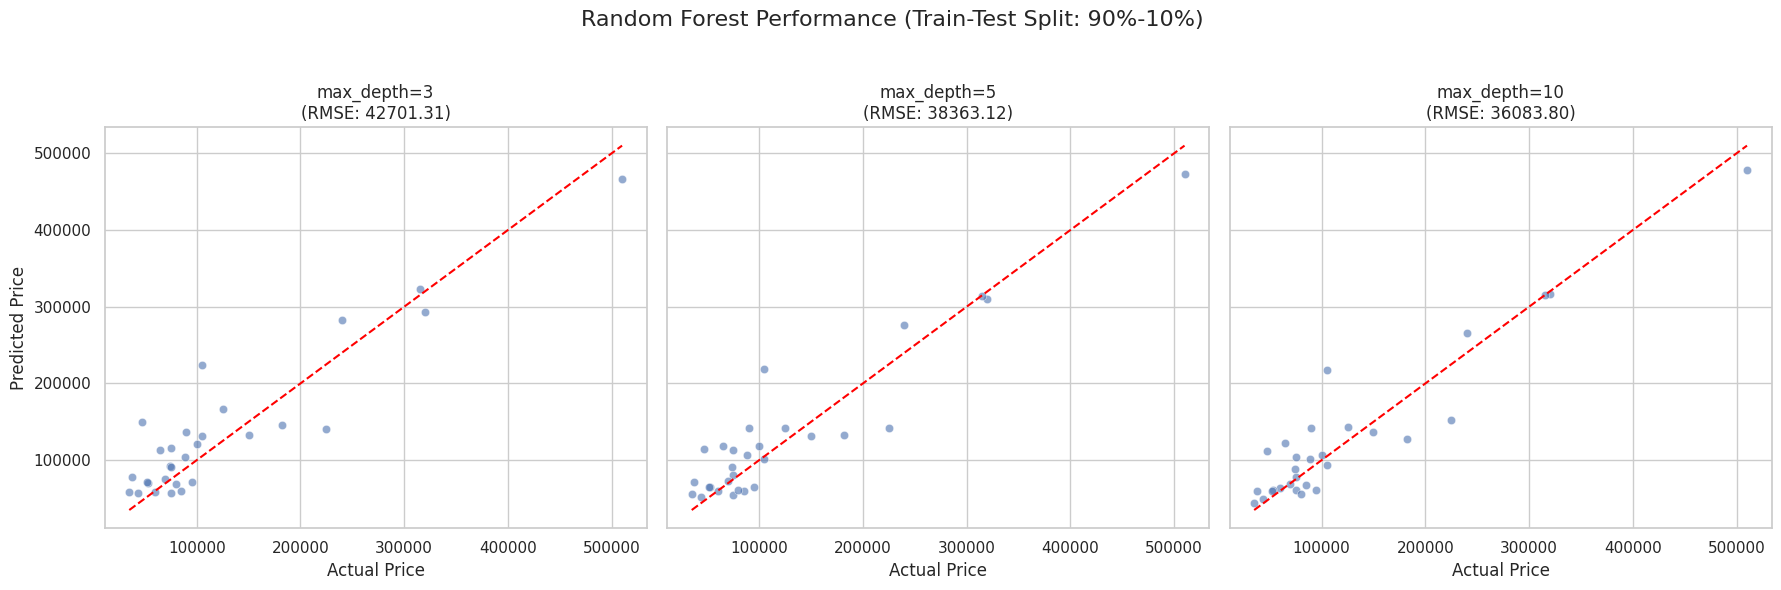


Train-Test Split: 70%-30%


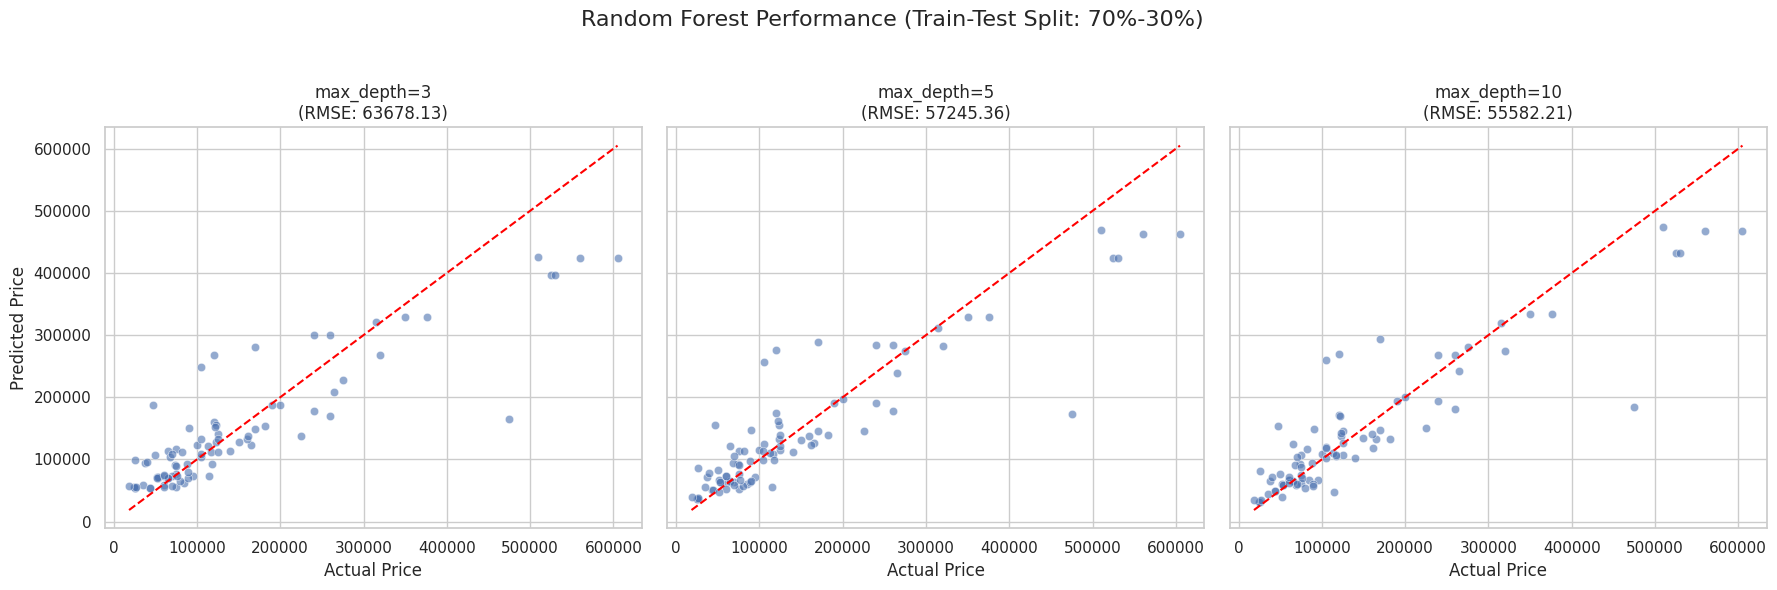


Train-Test Split: 50%-50%


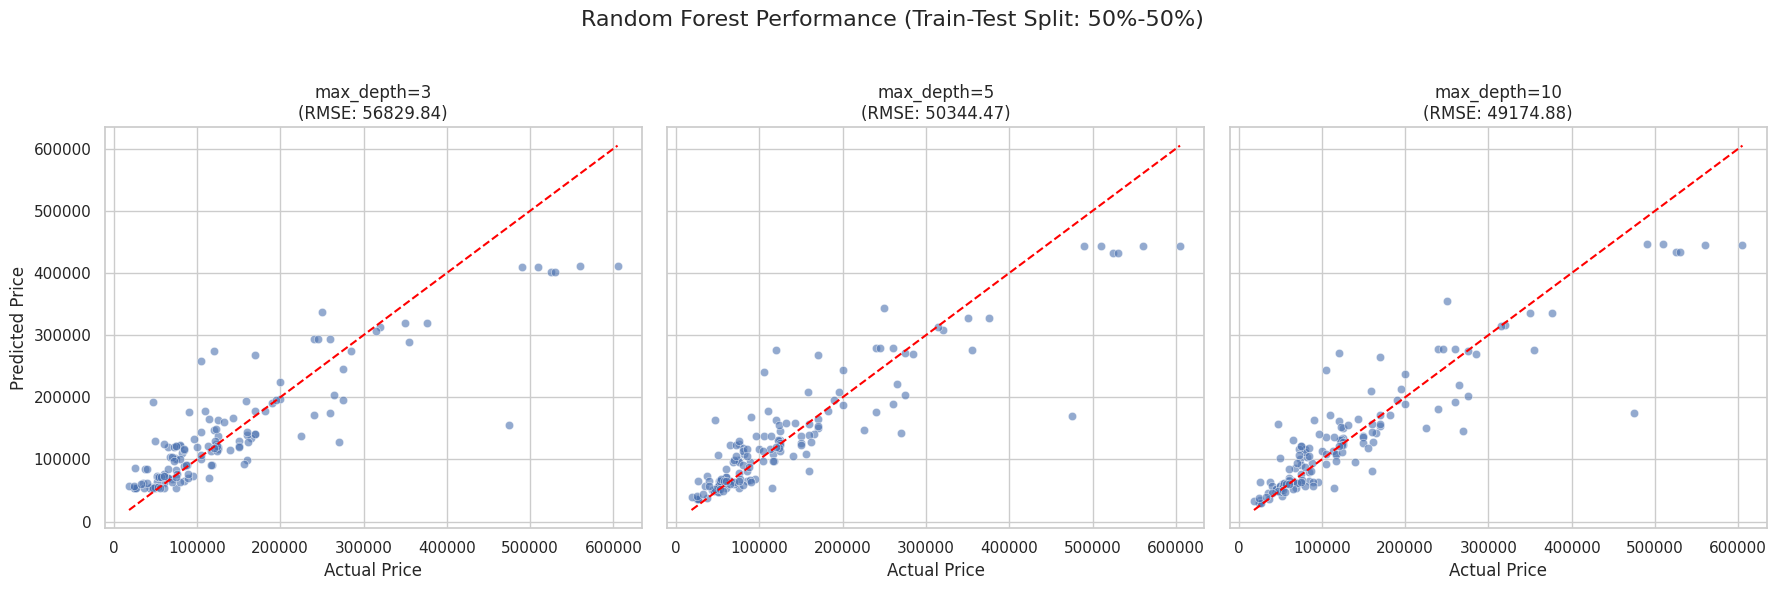


Train-Test Split: 75%-25%


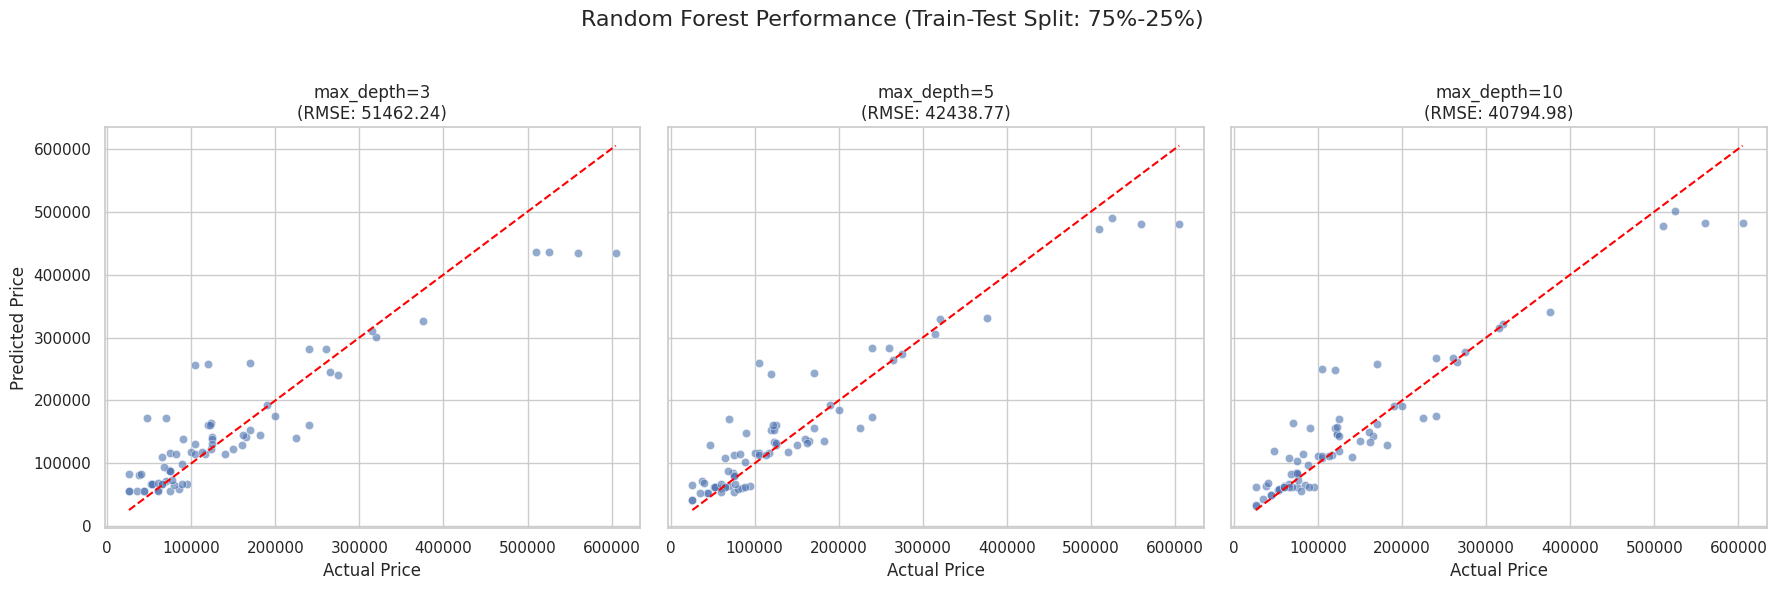

In [ ]:
from sklearn.ensemble import RandomForestRegressor

splits=[(0.9,0.1),(0.7,0.3),(0.5,0.5),(0.75,0.25)]
max_depth_values=[3, 5, 10]

for train_size, test_size in splits:
    print(f'\nTrain-Test Split: {int(train_size*100)}%-{int(test_size*100)}%')
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=train_size,random_state=42)

    fig,axes=plt.subplots(1,len(max_depth_values),figsize=(18, 6),sharey=True)
    fig.suptitle(f'Random Forest Performance (Train-Test Split: {int(train_size*100)}%-{int(test_size*100)}%)',fontsize=16)

    for i, max_depth in enumerate(max_depth_values):
        rf_model=RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        predictions=rf_model.predict(X_test)
        rmse=mean_squared_error(y_test,predictions,squared=False)

        y_test_flat=y_test.values.ravel() if hasattr(y_test,"values") else y_test.ravel()
        ax=axes[i]
        sns.scatterplot(x=y_test_flat,y=predictions,alpha=0.6,ax=ax)
        ax.plot([min(y_test_flat),max(y_test_flat)],[min(y_test_flat),max(y_test_flat)],color='red',linestyle='--')
        ax.set_title(f'max_depth={max_depth}\n(RMSE: {rmse:.2f})')
        ax.set_xlabel('Actual Price')
        if i == 0:
            ax.set_ylabel('Predicted Price')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

We get an RMSE of **~36,000**. Our lowest yet!!!

Why though?

Random Forest generally outperforms Decision Tree and other models because it reduces overfitting through ensembling, averaging predictions from multiple trees trained on random subsets of data and features.

### Conclusion

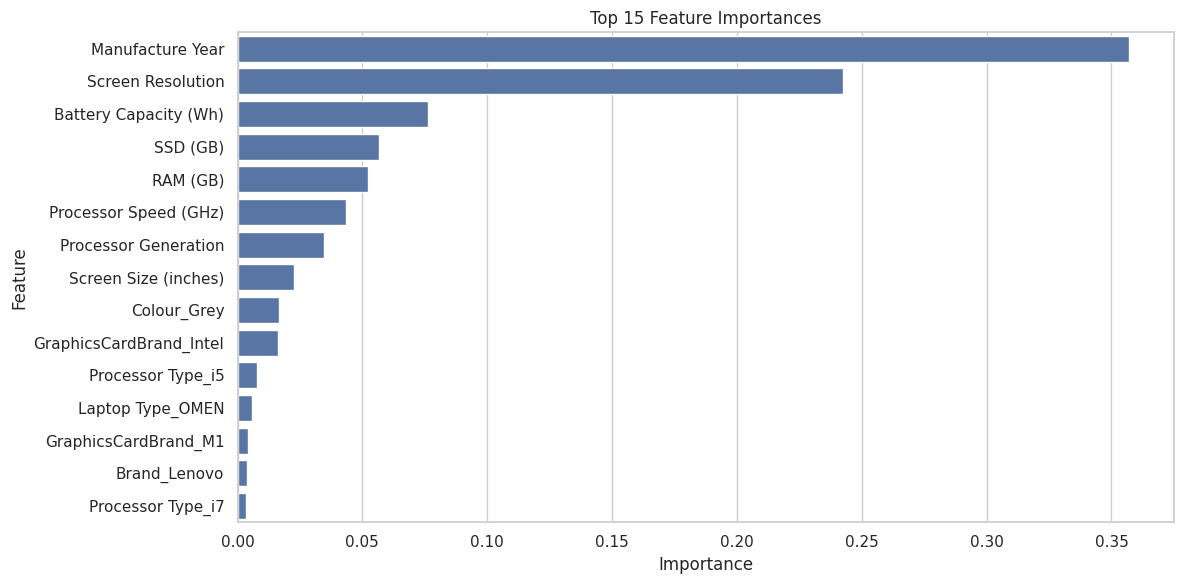

In [ ]:
def plot_feature_importance(model, feature_names, top_n=15):
    importances=model.feature_importances_
    indices=np.argsort(importances)[::-1]  # Sort features by importance in descending order
    top_indices=indices[:top_n]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances[top_indices], y=np.array(feature_names)[top_indices])
    plt.title(f'Top {top_n} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_model, X.columns, top_n=15)


So the price prediction for our laptops mostly depends on the manafacture year. Hmm..

As we see in the custom model we created below, results seem to be biased or miscontrued towards a few categorical variables as we singled out a few highly variable data like `Graphic_card` as hot-encoding it would have produced ambiguity and further variability in our results.

#### **However, which is our best model then?**

Firstly, it's necessary to understand why our RMSE's are presumably so 'high'. Our data on the y-axis spread over a large range of values. As scaling and normalizing the output values is not recommended or practiced, we don't implement that but considering our high range of values and RMSE, we're actually better off with an RMSE of ~0.3!!

#### **So onto seeing our best model. Any guesses??**

So there are 3 choices:

1. **Ridge Regression:**
  - RMSE ~35,000
  - Achieved over a 90%-10% split with alpha=0.2.
  - Best predictive accuracy among the options. Ideal for handling multicollinearity and avoids overfitting by penalizing large coefficients.

2. **Random Forest:**
  - RMSE ~36,000
  - Performed with max_depth=10 over a 90%-10% split.
  - Captures complex, non-linear relationships in the data but sacrifices interpretability.

3. **Lasso Regression:**

  - RMSE ~36,800
  - Achieved with alpha=0.1 and max_iter=5000 over a 75%-25% split.
  - Performs feature selection by reducing irrelevant coefficients to zero, leading to a simpler and more interpretable model.

### **Conclusion:**
- ##### **Ridge Regression is the best choice for us due to its lowest RMSE and balance between performance and simplicity as our data suggests a linear behaviour and there is no need for feature selection as well, which would be better off suited through Random Forest or Lasso respectively.**

- ##### **Furthermore, as the feature importance graph suggests above, the most important features seem to be `Manafacture_Year`, `Screen_Resolution` and `Battery Capacity` with `SSD` and `RAM` having an effect as well on the price of used Laptops.**


## **Part 4: Model Prediction**

### **Model to predict price**

In [ ]:
df.columns

Index(['Model Name', 'Manufacture Year', 'Processor Generation',
       'Processor Speed (GHz)', 'Graphics Card', 'SSD (GB)', 'RAM (GB)',
       'Price (PKR)', 'Screen Resolution', 'Battery Capacity (Wh)',
       ...
       'GraphicsCardBrand_AMD', 'GraphicsCardBrand_Graphics',
       'GraphicsCardBrand_Integrated', 'GraphicsCardBrand_Intel',
       'GraphicsCardBrand_M1', 'GraphicsCardBrand_M2', 'GraphicsCardBrand_M3',
       'GraphicsCardBrand_NVIDIA', 'Touchscreen?_No', 'Touchscreen?_Yes'],
      dtype='object', length=106)

Using only numerical features

In [ ]:
df2=df[["Manufacture Year","Processor Generation","Processor Speed (GHz)","SSD (GB)","RAM (GB)","Price (PKR)","Screen Resolution","Battery Capacity (Wh)","Screen Size (inches)","Touchscreen?_Yes"]]

In [ ]:
df2

,Manufacture Year,Processor Generation,Processor Speed (GHz),SSD (GB),RAM (GB),Price (PKR),Screen Resolution,Battery Capacity (Wh),Screen Size (inches),Touchscreen?_Yes
0,2019.0,8,1.6,256,8,54000,2073600,48,14.0,0.0
1,2017.0,8,1.6,128,8,75000,2073600,42,15.6,0.0
2,2017.0,7,2.5,256,8,47000,1049088,49,12.5,0.0
3,2022.0,12,1.2,256,4,99999,1049088,41,15.6,0.0
4,2019.0,11,4.2,256,16,120000,2073600,24,13.3,1.0
...,...,...,...,...,...,...,...,...,...,...
279,2020.0,11,2.4,512,8,131900,2304000,52,13.4,0.0
280,2019.0,10,1.1,512,16,140000,2073600,51,13.3,0.0
281,2023.0,13,1.6,512,16,158500,2073600,54,15.6,0.0
282,2022.0,11,2.5,512,32,275000,2073600,95,15.6,0.0


In [ ]:
X = df2.drop('Price (PKR)', axis=1)
y = df2[['Price (PKR)']]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)
X_const=sm.add_constant(X_scaled_df)
ols_model=sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Price (PKR)   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     102.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.27e-82
Time:                        18:35:37   Log-Likelihood:                -3492.0
No. Observations:                 284   AIC:                             7004.
Df Residuals:                     274   BIC:                             7040.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.349e+

R^2 score is decent. Close to 1.

In [ ]:
def get_user_input_with_limits():
    print("Please provide the following details (within the specified range):")
    manufacture_year = int(input(f"Manufacture Year (2006 - 2024): "))
    processor_generation = int(input(f"Processor Generation (1 - 14): "))
    processor_speed = float(input(f"Processor Speed (GHz) (1.0 - 5.1): "))
    ssd = int(input(f"SSD (GB) (0 - 1024): "))
    ram = int(input(f"RAM (GB) (2 - 40): "))
    screen_resolution = float(input(f"Screen Resolution (pixels in millions, e.g., 1024000 - 8294400): "))
    battery_capacity = float(input(f"Battery Capacity (Wh) (23 - 100): "))
    screen_size = float(input(f"Screen Size (inches) (10.1 - 17.3): "))
    touchscreen = int(input(f"Touchscreen (1 for Yes, 0 for No): "))

    # DataFrame for user input
    user_data = pd.DataFrame({
        "Manufacture Year": [manufacture_year],
        "Processor Generation": [processor_generation],
        "Processor Speed (GHz)": [processor_speed],
        "SSD (GB)": [ssd],
        "RAM (GB)": [ram],
        "Screen Resolution": [screen_resolution],
        "Battery Capacity (Wh)": [battery_capacity],
        "Screen Size (inches)": [screen_size],
        "Touchscreen?_Yes": [touchscreen]
    })
    return user_data

def predict_price_with_limits(ols_model, scaler, user_data):
    user_data_scaled = scaler.transform(user_data)
    user_data_scaled_df = pd.DataFrame(user_data_scaled, columns=user_data.columns)
    user_data_const = sm.add_constant(user_data_scaled_df, has_constant='add')
    predicted_price = ols_model.predict(user_data_const)
    return predicted_price[0]

# Get user input: Uncomment to test it!
# user_input = get_user_input_with_limits()
# # try:
#   predicted_price = predict_price_with_limits(ols_model, scaler, user_input)
#   print(f"Predicted Price (PKR): {predicted_price:.2f}")
# # except Exception as e:
#   print("An error occurred:", str(e))

This model is not working at its optimum level but still generates right values to some extent. The reason is that we are not including categorical variables. Also, there are less entries, with huge variety of data, but you get the vision. Uncomment the try block to run it!!

### **Model to calculate depreciation**

We cannot train a model on `df2` since it has only 135 samples..

In [ ]:
df_dep

,Brand,Name,Year of Manufacture,Type,Generation,Company,Processor,GHz,Operating System,Colour,Graphics,SSD (GB),RAM (GB),Screen Resolution,Battery (Watt Hours),Screen Size (inch),Touch?,Launch Price,Price (PKR)
0,MSI,Prestige 14,2019,Ultrabook,10th Gen,Intel,Core i7,1.1,Windows 10,White,NVIDIA GeForce GTX 1650,512,16,1920x1080,52.0,14.0,Yes,403800,80000
1,Asus,Chromebook C423NA,2010,NaN,1st,Intel,Intel Celeron N3350,1.1,Chrome OS,Silver,Intel HD Graphics 500,64,4,1366 x 768,38.0,14.0,No,72400,52300
2,Samsung,Series 7,2011,Laptop,2nd,Intel,quad-core Intel Core i7-3615QM,2.2,Windows 10,Black,Nvidia GeForce GT 650M graphics,256,8,1920 x 1080 (LEd),27.0,17.3,No,529200,29000
3,Acer,Swift 5,2017,Ultrabook,8th,Intel,Core i5,1.8,Windows 10,Green,2GB,256,8,1920x1080,56.0,14.0,Yes,194800,65000
4,Asus,ExpertBook P1,2019,NaN,10th,Intel,Intel Core i5,1,Windows 10,Black,Integrated,256,8,1920 x 1080,37.0,15.6,No,473400,460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Apple,MacBook Pro,2019,Laptop,9th,Intel,i7,2.6,macOS,Grey,Radeon Pro 5300M,512,16,3072x1920,100.0,16.0,No,667200,250000
131,Apple,MacBook Pro,2017,Laptop,7th,Intel,i7,2.3,macOS,Grey,Intel Iris Plus 640,1024,16,2560x1600,54.5,13.3,No,667200,115000
132,Apple,MacBook Pro,2019,Laptop,9th,Intel,i7,2.6,macOS,Grey,Radeon Pro 5300M,512,16,3072x1920,100.0,16.0,No,667200,190000
133,Apple,MacBook Pro M1,2021,Laptop,1st,Apple,M1 Pro,3.2,macOS,Grey,M1 Pro GPU,512,16,3456x2234,100.0,16.0,No,695000,435000


In [ ]:
df_dep['Year of Manufacture']=df_dep['Year of Manufacture'].astype(int) # converting Year of Manufacture to integer

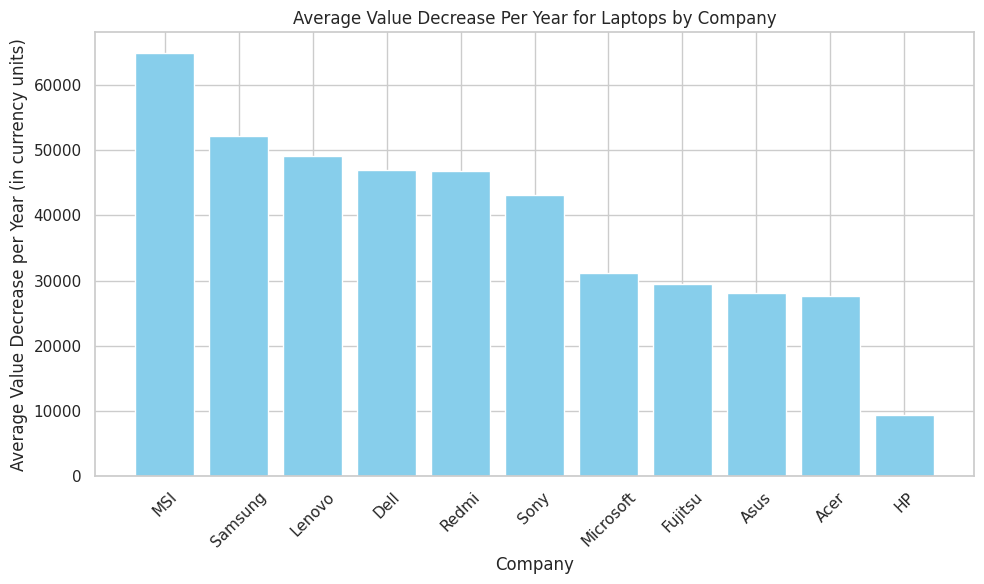

In [ ]:
df_dep['Years Since Launch'] = 2024 - df_dep['Year of Manufacture']
df_dep['Value Decrease Per Year'] = abs((df_dep['Price (PKR)'] - df_dep['Launch Price'])) / df_dep['Years Since Launch']
avg_decrease_per_company = df_dep.groupby('Brand')['Value Decrease Per Year'].mean().reset_index()

#sorting
avg_decrease_per_company = avg_decrease_per_company.sort_values(by='Value Decrease Per Year', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_decrease_per_company['Brand'], avg_decrease_per_company['Value Decrease Per Year'], color='skyblue')
plt.title('Average Value Decrease Per Year for Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Average Value Decrease per Year (in currency units)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


So, if someone is looking to buy a laptop which retains its value the most, HP seems to be the best option and MSI is the worst.

# **THANK YOU!!!**

---

